**Table of contents**<a id='toc0_'></a>    
- [Functions](#toc1_)    
  - [Compare distributions between BI and STAN](#toc1_1_)    
  - [Load BI for R](#toc1_2_)    
  - [Load BI](#toc1_3_)    
- [Rethinking](#toc2_)    
  - [Continuous variable: Model (model 4.3)](#toc2_1_)    
    - [BI](#toc2_1_1_)    
    - [BIR](#toc2_1_2_)    
    - [STAN](#toc2_1_3_)    
    - [Output comparison](#toc2_1_4_)    
    - [Parameter recovery](#toc2_1_5_)    
  - [Categorical variable: Model (model 5.9)](#toc2_2_)    
    - [BI](#toc2_2_1_)    
    - [BIR](#toc2_2_2_)    
    - [STAN](#toc2_2_3_)    
    - [Output comparaison](#toc2_2_4_)    
    - [Parameter recovery](#toc2_2_5_)    
  - [Continuous interactions terms (model 8.3)](#toc2_3_)    
    - [BI](#toc2_3_1_)    
    - [BIR](#toc2_3_2_)    
    - [STAN](#toc2_3_3_)    
    - [Output comparison](#toc2_3_4_)    
    - [Parameter recovery](#toc2_3_5_)    
  - [Binomial (model 11.1)](#toc2_4_)    
    - [BI](#toc2_4_1_)    
    - [BIR](#toc2_4_2_)    
    - [STAN](#toc2_4_3_)    
    - [Output comparison](#toc2_4_4_)    
    - [Parameter recovery](#toc2_4_5_)    
  - [Binomial with indices (model 11.4)](#toc2_5_)    
    - [BI](#toc2_5_1_)    
    - [BIR](#toc2_5_2_)    
    - [STAN](#toc2_5_3_)    
    - [Output comparison](#toc2_5_4_)    
    - [Parameter recovery](#toc2_5_5_)    
  - [Poisson (model 11.10)](#toc2_6_)    
    - [BI](#toc2_6_1_)    
    - [BIR](#toc2_6_2_)    
    - [STAN](#toc2_6_3_)    
    - [Output comparison](#toc2_6_4_)    
    - [Parameter recovery](#toc2_6_5_)    
  - [Negative binomial (model 11.12)](#toc2_7_)    
    - [Simulated data](#toc2_7_1_)    
    - [BI](#toc2_7_2_)    
    - [BIR](#toc2_7_3_)    
    - [STAN](#toc2_7_4_)    
    - [Output comparison](#toc2_7_5_)    
    - [Parameter recovery](#toc2_7_6_)    
  - [Multinomial (model 11.13)](#toc2_8_)    
    - [Simulated data](#toc2_8_1_)    
    - [BI](#toc2_8_2_)    
    - [BIR](#toc2_8_3_)    
    - [STAN](#toc2_8_4_)    
    - [Output comparison](#toc2_8_5_)    
    - [Parameter recovery](#toc2_8_6_)    
  - [Beta binomial (model m12.1)](#toc2_9_)    
    - [BI](#toc2_9_1_)    
    - [BIR](#toc2_9_2_)    
    - [STAN](#toc2_9_3_)    
    - [Output comparison](#toc2_9_4_)    
    - [Parameter recovery](#toc2_9_5_)    
  - [Zero inflated outcomes](#toc2_10_)    
    - [BI](#toc2_10_1_)    
    - [BIR](#toc2_10_2_)    
    - [STAN](#toc2_10_3_)    
    - [Output comparison](#toc2_10_4_)    
    - [Parameter recovery](#toc2_10_5_)    
  - [OrderedLogistic (Todo: PB)](#toc2_11_)    
  - [Varying interceps](#toc2_12_)    
    - [BI](#toc2_12_1_)    
    - [BIR](#toc2_12_2_)    
    - [STAN](#toc2_12_3_)    
    - [Output comparison](#toc2_12_4_)    
    - [Parameter recovery](#toc2_12_5_)    
  - [Varying effects](#toc2_13_)    
    - [Data simulation](#toc2_13_1_)    
    - [BI](#toc2_13_2_)    
    - [BIR](#toc2_13_3_)    
    - [STAN](#toc2_13_4_)    
    - [Output comparison](#toc2_13_5_)    
    - [Parameter recovery](#toc2_13_6_)    
  - [Gaussian Processes](#toc2_14_)    
    - [BI](#toc2_14_1_)    
    - [BIR](#toc2_14_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Functions](#toc0_)
## <a id='toc1_1_'></a>[Compare distributions between BI and STAN](#toc0_)

In [1]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)
from BI import bi

import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax

m = bi(platform='cpu')
data_path = os.path.dirname(os.path.abspath("")) + "/BI/resources/data/"

jax.local_device_count 32


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_bi_data(m):
    #data_dict = m.sampler.get_samples()
    data_dict = m.posteriors
    # Initialize an empty DataFrame to collect parameters
    all_params = []

    # Loop through each array in the dictionary
    for key, array in data_dict.items():
        # Check the shape of the array
        if array.ndim > 1 and array.ndim < 3:
            # Create a DataFrame from the array and add a column for each parameter
            param_df = pd.DataFrame(array)
            # Rename columns to include the parameter name
            param_df.columns = [f"{key}_{j+1}" for j in range(array.shape[1])]
            all_params.append(param_df)
    
        elif array.ndim >= 3:# we have a matrix
            array_shape = array.shape
            row = array_shape[1]
            col = array_shape[2]
            for a in range(col):
                for b in range(row):
                    all_params.append(pd.DataFrame({key + '_' + str(a) +  '_' + str(b): array[:,a,b]}))
        else:
            # If it's a 1D array, create a single column DataFrame
            all_params.append(pd.DataFrame({key: array}))

    # Concatenate all parameter DataFrames along the rows
    df_bi = pd.concat(all_params, axis=1)
    return df_bi

def prepare_stan_data(df):
    columns_to_remove = ['lp__',	'accept_stat__',	'stepsize__',	'treedepth__',	'n_leapfrog__',	'divergent__',	'energy__']
    d = df.drop(columns=columns_to_remove)
    return d

def combine_data(df_bi, d):
    #df_bi = pd.DataFrame(samples)
    params = df_bi.columns.values
    d.columns = df_bi.columns

    df_bi['method'] = 'BI'
    d['method'] = 'STAN'
    d_comb = pd.concat([d, df_bi], ignore_index=True)
    return d_comb

def plot_comparaison(m, df):

    d = prepare_stan_data(df)
    df_bi = prepare_bi_data(m)
    d_comb = combine_data(df_bi, d)

    # Calculate the number of rows needed
    params = df_bi.columns.values[:-1]
    num_params = len(params)
    num_cols = 3
    num_rows = (num_params + num_cols - 1) // num_cols  # Ceiling division

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5), sharey=True)
    if num_rows * num_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    a = 0

    for i in d_comb.columns:
        if i in params:
            if a == 0:
                axes[a].set_ylabel('Density')
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=True)
                axes[a].spines['right'].set_visible(False)
                a += 1
            elif a == num_params:
                print('found')
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=True)
                a += 1
            elif a < num_params:
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=False)
                a += 1


    plt.subplots_adjust(wspace=0.0, left=0.1, right=0.9)
    axes[1].set_yticks([])

    # Remove extra subplots if there are any
    for a in range(len(params), len(axes)):
        fig.delaxes(axes[a])

    plt.subplots_adjust(wspace=0.0, left=0.1, right=0.9)
    axes[1].set_yticks([])
    plt.show()
    return plt


## <a id='toc1_2_'></a>[Load BI for R](#toc0_)

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
#devtools::install_github("https://github.com/BGN-for-ASNA/BIR.git", force = T)
library(BayesianInference)
m=importBI()

Error in library(BayesianInference) : 
  there is no package called ‘BayesianInference’
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages
Error in library(BayesianInference) : 
  there is no package called ‘BayesianInference’


RInterpreterError: Failed to parse and evaluate line '#devtools::install_github("https://github.com/BGN-for-ASNA/BIR.git", force = T)\nlibrary(BayesianInference)\nm=importBI()\n'.
R error message: 'Error in library(BayesianInference) : \n  there is no package called ‘BayesianInference’'
R stdout:
Error in library(BayesianInference) : 
  there is no package called ‘BayesianInference’
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

## <a id='toc1_3_'></a>[Load BI](#toc0_)

# <a id='toc2_'></a>[Rethinking](#toc0_)

## <a id='toc2_1_'></a>[Continuous variable: Model (model 4.3)](#toc0_)

### <a id='toc2_1_1_'></a>[BI](#toc0_)

In [2]:
import time as tm
# setup platform------------------------------------------------
m = bi(platform='cpu')

# import data ------------------------------------------------
m.data(data_path + 'Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(['weight'])


# define model ------------------------------------------------
def model(weight, height):    
    a = m.dist.normal( 178, 20, name = 'a')
    b = m.dist.log_normal( 0, 1, name = 'b')   
    s = m.dist.uniform( 0, 50, name = 's')
    m.dist.normal(a + b * weight , s, obs=height)

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500) 
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 412.23it/s, 3 steps of size 7.80e-01. acc. prob=0.92]


,mean,sd,hdi_5.5%,hdi_94.5%
a,154.65,0.28,154.19,155.05
b,5.78,0.30,5.28,6.22
s,5.17,0.20,4.87,5.48


In [ ]:
%%R
library(BayesianInference)
m=importBI(platform='cpu')

# Load csv file
m$data(paste(system.file(package = "BayesianInference"),"/data/Howell1.csv", sep = ''), sep=';')

# fileter data frame
m$df = m$df[m$df$age > 18,]

# Scale
m$scale(list('weight')) 

# convert data to jax arrays
m$data_to_model(list('weight', 'height'))

# Define model ------------------------------------------------
model <- function(height, weight){
  # Parameters priors distributions
  s = bi.dist.uniform(0, 50, name = 's')
  a = bi.dist.normal(178, 20,  name = 'a')
  b = bi.dist.lognormal(0, 1, name = 'b')
  
  # Likelihood
  m$normal(a + b * weight, s, obs = height)
}

# Run mcmc ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary()

jax.local_device_count 16



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_1_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
nest_asyncio.apply()
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass
stan_code = """
data{
  vector[346] height;
  vector[346] weight;
}
parameters{
  real a;
  real<lower=0> b;
  real<lower=0,upper=50> s;
}
model{
  vector[346] mu;
  s ~ uniform( 0 , 50 );
  b ~ lognormal( 0 , 1 );
  a ~ normal( 178 , 20 );
  for ( i in 1:346 ) {
    mu[i] = a + b* weight[i] ;
  }
  height ~ normal( mu , s );  
  
}
"""
data = {
  'height': m.df.height.values,
  'weight': m.df.weight.values,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_1_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_1_5_'></a>[Parameter recovery](#toc0_)


In [ ]:


def model(weight, height):    
    a = m.dist.normal( 178, 20, name = 'a')   
    b = m.dist.lognormal(  0, 1, name = 'b')   
    s = m.dist.uniform( 0, 50, name = 's')
    m.dist.normal(a + b * weight , s, obs=height)

def simulate_height(weight, a, b, s):    
    weight = (weight - weight.mean())/weight.std()
    height = m.dist.normal( a + b * weight , s, sample = True)
    return weight, height

def estimate(weight, a, b, s):
    weight, height = simulate_height(weight,a, b, s)
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"weight": weight, "height": height})
    m.scale(['weight'])
    m.data_to_model(['weight', 'height'])
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(weight, a, b, s, N, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(weight[i,:], a[i,:], b[i,:], s[i,:])
        data = {'sim': [i,i,i], 'parameter': estimations.index.values, 'simulated' : [a[i,:][0], b[i,:][0], s[i,:][0]], 'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

N = 100
nsim = 100
a = m.dist.normal(178, 20, shape=(nsim, 1), sample=True)
b = m.dist.lognormal(0, 1, shape=(nsim, 1,), sample=True, seed = 2)
s = m.dist.uniform(0, 50, shape=(nsim, 1), sample=True)
weight = m.dist.normal( 80, 30, sample = True, shape = (nsim, N))
res = param_recovery(weight, a, b, s, N, nsim = nsim)

## <a id='toc2_2_'></a>[Categorical variable: Model (model 5.9)](#toc0_)

### <a id='toc2_2_1_'></a>[BI](#toc0_)

In [3]:
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data(data_path + 'milk.csv', sep=';') 
m.index(["clade"])
m.scale(['kcal_per_g'])

def model(kcal_per_g, index_clade):
    a = m.dist.normal(0, 0.5, shape=(4,), name = 'a')
    s = m.dist.exponential( 1, name = 's')    
    mu = a[index_clade]
    m.dist.normal(mu, s, obs=kcal_per_g)

m.data_to_model(['kcal_per_g', "index_clade"])
m.fit(model) 
m.sampler.print_summary(0.89)


jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 479.33it/s, 7 steps of size 6.13e-01. acc. prob=0.93]



                mean       std    median      5.5%     94.5%     n_eff     r_hat
      a[0]     -0.46      0.24     -0.47     -0.86     -0.12    562.99      1.00
      a[1]      0.36      0.25      0.36     -0.08      0.72    618.42      1.00
      a[2]      0.64      0.28      0.63      0.16      1.03    668.73      1.00
      a[3]     -0.54      0.32     -0.54     -1.03     -0.07    496.46      1.00
         s      0.80      0.12      0.79      0.62      0.97    422.26      1.00

Number of divergences: 0


### <a id='toc2_2_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)
m=importBI(platform='cpu')

# Load csv file
m$data(paste(system.file(package = "BI"),"/data/milk.csv", sep = ''), sep=';')
m$scale(list('kcal.per.g')) # Manipulate
m$index(list('clade')) # Scale
m$data_to_model(list('kcal_per_g', 'index_clade')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(kcal_per_g, index_clade){
  # Parameters priors distributions
  beta =  bi.dist.normal( 0, 0.5, name = 'beta', shape=c(4))
  sigma = bi.dist.exponential(1, name = 's')
  # Likelihood
  m$normal(beta[index_clade], sigma, obs=kcal_per_g)
}

# Run mcmc ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distributionslibrary(BI)


### <a id='toc2_2_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """
data{
    vector[29] K;
    array[29] int clade_id;
}
parameters{
    vector[4] a;
    real<lower=0> s;
}
model{
    vector[29] mu;
    s ~ exponential( 1 );
    a ~ normal( 0 , 0.5 );
    for ( i in 1:29 ) {
        mu[i] = a[clade_id[i]];
    }
    K ~ normal( mu , s );
    
}
"""
data = {
  'clade_id': m.df.index_clade.values+1,
  'K': m.df.kcal_per_g.values,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_2_4_'></a>[Output comparaison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_2_5_'></a>[Parameter recovery](#toc0_)

In [ ]:
m = bi(platform='cpu')
import jax.numpy as jnp
def model(kcal_per_g, index_clade):
    a = m.dist.normal(0, 0.5, shape=(4,), name = 'a')
    s = m.dist.exponential( 1, shape = (1,), name = 's')    
    tmp = a[index_clade]
    m.dist.normal(tmp, s, obs=kcal_per_g)
    
def simulate_data(a, sigma, N):
    index_clade = m.dist.categorical(probs=jnp.array([0.25,0.25,.25,.25]), shape = (N,), sample=True).astype(int) # Generate clade index
    tmp = a[index_clade] # Generate mean of each clade
    cal = m.dist.normal(tmp, sigma, sample = True) # Generate calories based on mean and std
    return cal, index_clade
    
def estimate(alpha, sigma, N):
    cal, index_clade = simulate_data(alpha, sigma, N) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"kcal_per_g": cal, "index_clade": index_clade})
    #m.scale(['kcal_per_g'])
    m.data_to_model(['kcal_per_g', 'index_clade'])
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(a, sigma, N, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(a[i], sigma[i], N)
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([jnp.array(a[i]), jnp.array([sigma[i][0]])]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

N = 30
Ngrp = 4
nsim = 100
a = m.dist.normal(0, 1, shape=(nsim, Ngrp,), sample=True, seed = 0)
sigma = m.dist.halfcauchy(1, shape=(nsim, 1,), sample=True, seed = 10)

result = param_recovery(a,sigma, N = N, nsim = nsim)

## <a id='toc2_3_'></a>[Continuous interactions terms (model 8.3)](#toc0_)

### <a id='toc2_3_1_'></a>[BI](#toc0_)

In [4]:
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data(data_path + 'tulips.csv', sep=';') 
m.scale(['blooms', 'water', 'shade'])

# define model ------------------------------------------------
def model(blooms,shade, water):
    sigma = m.dist.exponential(1, name = 'sigma')
    bws = m.dist.normal(0, 0.25, name = 'bws')
    bs = m.dist.normal(0, 0.25, name = 'bs')
    bw = m.dist.normal(0, 0.25, name = 'bw')
    a = m.dist.normal(0.5, 0.25, name = 'a')
    mu = a + bw*water + bs*shade + bws*water*shade
    m.dist.normal(mu, sigma, obs=blooms)

# Run sampler ------------------------------------------------ 
m.fit(model) 

# Diagnostic ------------------------------------------------
m.sampler.print_summary(0.89)


jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 475.14it/s, 7 steps of size 6.60e-01. acc. prob=0.91]



                mean       std    median      5.5%     94.5%     n_eff     r_hat
         a      0.09      0.10      0.09     -0.07      0.26    470.31      1.00
        bs     -0.31      0.12     -0.32     -0.49     -0.11    535.87      1.00
        bw      0.56      0.11      0.57      0.38      0.72    430.84      1.00
       bws     -0.32      0.11     -0.32     -0.50     -0.16    460.55      1.00
     sigma      0.58      0.10      0.57      0.43      0.73    256.89      1.00

Number of divergences: 0


### <a id='toc2_3_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)
m=importBI(platform='cpu')

# Load csv file
m$data(paste(system.file(package = "BI"),"/data/tulips.csv", sep = ''), sep=';')
m$scale(list('blooms', 'water', 'shade')) # Scale
m$data_to_model(list('blooms', 'water', 'shade')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(blooms, water,shade){
  # Parameters priors distributions
  alpha = bi.dist.normal( 0.5, 0.25, name = 'a')
  bw = bi.dist.normal( 0,  0.25, name = 'bw')
  bs = bi.dist.normal(  0,  0.25, name = 'bs')   
  bws = bi.dist.normal(  0, 0.25, name = 'bws') 
  sigma = bi.dist.exponential(1, name = 's')
  # Likelihood
  m$normal(alpha + bw*water + bs*shade + bws*water*shade, sigma, obs=blooms)
}

# Run mcmc ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distributions

### <a id='toc2_3_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    vector[27] blooms_std;
    array[27] int shade_cent;
    array[27] int water_cent;
}
parameters{
    real a;
    real bs;
    real bw;    
    real bws;
    real<lower=0> sigma;
}
model{
    vector[27] mu;
    sigma ~ exponential( 1 );
    bws ~ normal( 0 , 0.25 );
    bs ~ normal( 0 , 0.25 );
    bw ~ normal( 0 , 0.25 );
    a ~ normal( 0.5 , 0.25 );
    for ( i in 1:27 ) {
        mu[i] = a + bw * water_cent[i] + bs * shade_cent[i] + bws * water_cent[i] * shade_cent[i];
    }

    
    blooms_std ~ normal( mu , sigma );
}
"""

data = {
    'blooms_std' : m.df["blooms"].values,
    "water_cent": m.df["water"].values.astype(int),
    "shade_cent": m.df["shade"].values.astype(int),
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_3_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_3_5_'></a>[Parameter recovery](#toc0_)

In [ ]:
m = bi(platform='cpu')

def model(blooms,shade, water):
    sigma = m.dist.exponential(1, name = 'sigma')
    bws = m.dist.normal(0, 0.25, name = 'bws')
    bs = m.dist.normal(0, 0.25, name = 'bs')
    bw = m.dist.normal(0, 0.25, name = 'bw')
    a = m.dist.normal(0.5, 0.25, name = 'a')
    mu = a + bw*water + bs*shade + bws*water*shade
    m.dist.normal(mu, sigma, obs=blooms)

def simulate_bloom(water, shade, sigma, bws, bs, bw, a ):
    mu = a + bw*water + bs*shade + bws*water*shade
    return  m.dist.normal(mu, sigma, sample=True) # bloom
    
def estimate(water, shade, sigma,bws, bs, bw, a ):
    blooms = simulate_bloom(water, shade, sigma,bws, bs, bw, a ) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"water": water, "shade": shade, "blooms": blooms})
    #m.scale(['blooms', 'shade', 'blooms'])
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(water, shade, sigma, bws, bs, bw, a, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(water, shade, sigma[i], bws[i], bs[i], bw[i], a[i] )
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], bs[i], bw[i], bws[i], sigma[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
# Shade and water are all possible conbinations of shade (1 to 3) and water (1 to 3)
m.data(data_path + 'tulips.csv', sep=';') 
shade = m.df.shade.values
water = m.df.water.values
sigma = m.dist.exponential(1, name = 'sigma', shape = (nsim, 1,), sample = True)
bws = m.dist.normal(0, 0.25, name = 'bws', shape = (nsim, 1,), sample = True, seed = 1)
bs = m.dist.normal(0, 0.25, name = 'bs', shape = (nsim, 1,), sample = True, seed = 2)
bw = m.dist.normal(0, 0.25, name = 'bw', shape = (nsim, 1,), sample = True, seed = 3)
a = m.dist.normal(0.5, 0.25, name = 'a', shape = (nsim, 1,), sample = True, seed = 4)

result = param_recovery(water, shade, sigma,bws, bs, bw, a, nsim = nsim)

## <a id='toc2_4_'></a>[Binomial (model 11.1)](#toc0_)

### <a id='toc2_4_1_'></a>[BI](#toc0_)

In [9]:
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data(data_path + 'chimpanzees.csv', sep=';') 
m.data_to_model(['pulled_left'])
def model(pulled_left):
    a = m.dist.normal( 0, 10, shape=(1,), name = 'a')
    m.dist.binomial(logits=a[0], obs=pulled_left)

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500) 

# Diagnostic ------------------------------------------------
m.summary()


jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:01<00:00, 634.73it/s, 3 steps of size 9.99e-01. acc. prob=0.90]


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],0.32,0.09,0.18,0.46


### <a id='toc2_4_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/chimpanzees.csv", sep = ''), sep=';')
m$data_to_model(list('pulled_left')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(pulled_left){
  # Parameters priors distributions
  alpha = bi.dist.normal( 0, 10, name = 'alpha', shape=c(1))
  # Likelihood
  m$binomial(logits = alpha, obs=pulled_left)
}


# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


### <a id='toc2_4_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    array[504] int pulled_left;
}
parameters{
    real a;
}
model{
    real p;
    a ~ normal( 0 , 10 );
    p = a;
    p = inv_logit(p);
    pulled_left ~ binomial( 1 , p );    
}
"""

data = {
    'pulled_left' : m.df["pulled_left"].values.astype(int)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_4_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_4_5_'></a>[Parameter recovery](#toc0_)

In [ ]:
def model(pulled_left):
    a = m.dist.normal( 0, 10,shape = (1,), name = 'a')
    m.dist.binomial(logits=a, obs=pulled_left)

def sim_pulled_left(a):
    return m.dist.binomial(logits=a, sample=True, shape=(1000,))

def estimate(a):
    pulled_left = sim_pulled_left(a)[:,0] # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"pulled_left": pulled_left})
    #m.scale(['blooms', 'shade', 'blooms'])
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(a, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(a[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : a[i], 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
a = m.dist.normal( 0, 1, shape = (nsim, 1), sample=True)
result = param_recovery(a, nsim = nsim)

## <a id='toc2_5_'></a>[Binomial with indices (model 11.4)](#toc0_)

### <a id='toc2_5_1_'></a>[BI](#toc0_)

In [10]:
m = bi(platform='cpu')
m.data(data_path + 'chimpanzees.csv', sep=';') 
m.df['treatment'] =  m.df.prosoc_left + 2 * m.df.condition
m.df['actor'] = m.df['actor'] - 1

m.data_to_model(['actor', 'treatment', 'pulled_left'])

def model(actor, treatment, pulled_left):
    a = m.dist.normal(0, 1.5, shape = (7,), name='a')
    b = m.dist.normal(0, 0.5, shape = (4,), name='b')
    p = a[actor] + b[treatment]
    m.dist.binomial(1, logits=p, obs=pulled_left)

# Run sampler ------------------------------------------------
m.fit(model) 
# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 438.16it/s, 7 steps of size 4.51e-01. acc. prob=0.90]


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],-0.41,0.32,-0.91,0.07
a[1],3.93,0.75,2.84,5.25
a[2],-0.71,0.32,-1.20,-0.22
a[3],-0.71,0.32,-1.25,-0.20
a[4],-0.41,0.32,-0.88,0.14
a[5],0.53,0.33,0.02,1.02
a[6],2.03,0.42,1.34,2.64
b[0],-0.08,0.28,-0.50,0.39
b[1],0.44,0.27,-0.01,0.84
b[2],-0.43,0.28,-0.89,0.00


### <a id='toc2_5_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/chimpanzees.csv", sep = ''), sep=';')
m$df$treatment =  m$df$prosoc_left + 2 * m$df$condition
m$df$actor = m$df$actor - 1
keys <- c("actor", "treatment", 'pulled_left')
values <- list(jnp$array(as.integer(m$df$actor)),jnp$array(as.integer(m$df$treatment)), jnp$array(as.integer(m$df$pulled_left)))
m$data_on_model = py_dict(keys, values, convert = TRUE)

# Define model ------------------------------------------------
model <- function(actor, treatment, pulled_left){
  # Parameters priors distributions
  a = bi.dist.normal( 0, 1.5, shape = c(7), name = 'a') # 7 actors
  b = bi.dist.normal( 0, 0.5, shape = c(4), name = 'b') # 4 treatments
  p = a[actor] + b[treatment]
  # Likelihood
  m$binomial(1,logits =  p, obs=pulled_left)
}


# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

### <a id='toc2_5_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    array[504] int pulled_left;
    array[504] int treatment;
    array[504] int actor;
}
parameters{
    vector[7] a;
    vector[4] b;
}
model{
    vector[504] p;
    a ~ normal( 0 , 1.5 );
    b ~ normal( 0 , 0.5 );    
    for ( i in 1:504 ) {
        p[i] = a[actor[i]] + b[treatment[i]];
        p[i] = inv_logit(p[i]);
    }
    pulled_left ~ binomial( 1 , p );
}

"""

data = {
    'pulled_left' : m.df["pulled_left"].values.astype(int),
    'treatment' : m.df["treatment"].values.astype(int) + 1,
    'actor' : m.df["actor"].values.astype(int) +1 
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_5_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_5_5_'></a>[Parameter recovery](#toc0_)

In [ ]:
m = bi(platform='cpu')
m.data(data_path + 'chimpanzees.csv', sep=';') 
m.df['treatment'] =  m.df.prosoc_left + 2 * m.df.condition
m.df['actor'] = m.df['actor'] - 1

def model(actor, treatment, pulled_left):
    a = m.dist.normal(0, 1.5, shape = (7,), name='a')
    b = m.dist.normal(0, 0.5, shape = (4,), name='b')
    p = a[actor] + b[treatment]
    m.dist.binomial(1, logits=p, obs=pulled_left)

def sim_pulled_left(actor, treatment, a, b):
    p = a[actor] + b[treatment]
    return m.dist.binomial(1, logits=p, sample=True)

def estimate(actor, treatment, a, b):
    pulled_left = sim_pulled_left(actor, treatment, a, b) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"pulled_left": pulled_left, "actor": actor, "treatment": treatment})
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(actor, treatment, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(actor, treatment, a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
actor = jnp.array(m.df['actor'])
treatment = jnp.array(m.df['treatment'])
a = m.dist.normal(0, 1.5, shape = (nsim, 7), name='a', sample=True)
b = m.dist.normal(0, 0.5, shape = (nsim, 4), name='b', sample=True)

result = param_recovery(actor, treatment, a, b, nsim)

## <a id='toc2_6_'></a>[Poisson (model 11.10)](#toc0_)

### <a id='toc2_6_1_'></a>[BI](#toc0_)

In [ ]:
# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------
m.data(data_path + 'Kline.csv', sep=';') 
m.scale(['population'])
m.df["cid"] = (m.df.contact == "high").astype(int)
#m.data_to_model(['total_tools', 'population', 'cid'])
def model(cid, population, total_tools):
    a = m.dist.normal(3, 0.5, shape= (2,), name='a')
    b = m.dist.normal(0, 0.2, shape=(2,), name='b')
    l = jnp.exp(a[cid] + b[cid]*population)
    m.dist.poisson(l, obs=total_tools)

# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:01<00:00, 507.07it/s, 3 steps of size 6.07e-01. acc. prob=0.91]


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],3.21,0.10,3.06,3.37
a[1],3.63,0.09,3.49,3.79
b[0],0.36,0.05,0.28,0.44
b[1],0.06,0.20,-0.27,0.36


### <a id='toc2_6_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Kline.csv", sep = ''), sep=';')
m$scale(list('population'))# Scale
m$df["cid"] =  as.integer(ifelse(m$df$contact == "high", 1, 0)) # Manipulate
m$data_to_model(list('total_tools', 'population', 'cid' )) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(total_tools, population, cid){
  # Parameters priors distributions
  alpha = bi.dist.normal(3, 0.5, name='alpha', shape = c(2))
  beta = bi.dist.normal(0, 0.2, name='beta', shape = c(2))
  l = jnp$exp(alpha[cid] + beta[cid]*population)
  # Likelihood
  m$poisson(l, obs=total_tools)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

### <a id='toc2_6_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """ 
data{
    array[10] int T;
    vector[10] P;
    array[10] int cid;
}
parameters{
    vector[2] a;
    vector[2] b;
}
model{
    vector[10] lambda;
    b ~ normal( 0 , 0.2 );
    a ~ normal( 3 , 0.5 );
    for ( i in 1:10 ) {
       lambda[i] = a[cid[i]] + b[cid[i]] * P[i];
       lambda[i] = exp(lambda[i]);
    }
    T ~ poisson( lambda );
}

"""

data = {
    'T' : m.df["total_tools"].values.astype(int),
    'P' : m.df["population"].values.astype(float),
    'cid' : m.df["cid"].values.astype(int) +1
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_6_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_6_5_'></a>[Parameter recovery](#toc0_)

In [ ]:

def model(cid, population, total_tools):
    a = m.dist.normal(3, 0.5, shape = (2,), name='a')
    b = m.dist.normal(0, 0.2, shape = (2,), name='b')
    l = jnp.exp(a[cid] + b[cid]*population)
    m.dist.poisson(l, obs=total_tools)

def sim_total_tools(cid, population, a, b):
    l = jnp.exp(a[cid] + b[cid]*population)
    return m.dist.poisson(l, sample=True)

def estimate(a, b):
    # Run model
    m = bi(print_devices_found=False)
    m.data(data_path + 'Kline.csv', sep=';') 
    m.scale(['population'])
    m.df["cid"] = (m.df.contact == "high").astype(int)

    total_tools = sim_total_tools(m.df.cid.values, m.df.population.values, a, b) # Simulate data
    m.df = pd.DataFrame({"cid": m.df.cid.values, 'population' :m.df.population.values, "total_tools": total_tools})
    m.fit(model, num_samples=1000, num_warmup = 1000, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(cid, population, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
m.data(data_path + 'Kline.csv', sep=';') 
m.scale(['population'])
m.df["cid"] = (m.df.contact == "high").astype(int)
cid = m.df.cid.values
population = m.df.population.values
a = m.dist.normal(3, 0.5, shape= (nsim, 2,), name='a', sample=True, seed = 1)
b = m.dist.normal(0, 0.2, shape= (nsim, 2,), name='b', sample=True, seed = 3)
result = param_recovery(cid, population, a, b, nsim)

In [ ]:
m.dist.normal(0, 0.2, shape= (100, 2,), name='b', sample=True, seed = 3)

## <a id='toc2_7_'></a>[Negative binomial (model 11.12)](#toc0_)

### <a id='toc2_7_1_'></a>[Simulated data](#toc0_)

In [ ]:
import tensorflow_probability.substrates.jax.distributions as tfd
import pandas as pd
import random as random2
import jax
init_key, sample_key = jax.random.split(jax.random.PRNGKey(int(random2.randint(0, 10000000))))
init_key = jnp.array(init_key)
num_days = 3000
y = tfd.Poisson(rate=1.5).sample(seed = init_key, sample_shape=(num_days,))
num_weeks = 400
y_new = tfd.Poisson(rate=0.5 * 7).sample(seed = init_key, sample_shape=(num_weeks,))
y_all = np.concatenate([y, y_new])
exposure = np.concatenate([np.repeat(1, num_days), np.repeat(7, num_weeks)])
monastery = np.concatenate([np.repeat(0, num_days), np.repeat(1, num_weeks)])
d = pd.DataFrame.from_dict(dict(y=y_all, days=exposure, monastery=monastery))
d["log_days"] = d.days.pipe(np.log)
d.to_csv(data_path + 'Sim dat Gamma poisson.csv', index=False)

### <a id='toc2_7_2_'></a>[BI](#toc0_)

In [12]:
# setup platform------------------------------------------------
m = bi()
m.data(data_path + 'Sim dat Gamma poisson.csv', sep=',') 
m.data_on_model={'y': jnp.array(m.df.y.values, dtype=int), 'log_days': jnp.array(m.df.log_days.values, dtype=float), 'monastery': jnp.array(m.df.monastery.values, dtype=int)}
def model(log_days, monastery, y):
    a = m.dist.normal(0, 1, name = 'a')
    b = m.dist.normal(0, 1, name = 'b')
    l = jnp.exp(log_days + a + b * monastery)
    m.dist.poisson(rate = l, is_sparse=True, obs=y)

# Run sampler ------------------------------------------------
m.fit(model, num_warmup = 1000, num_samples=1000) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 2000/2000 [00:03<00:00, 526.93it/s, 3 steps of size 7.88e-01. acc. prob=0.89]


,mean,sd,hdi_5.5%,hdi_94.5%
a,0.41,0.02,0.38,0.43
b,-1.11,0.03,-1.16,-1.06


### <a id='toc2_7_3_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Sim dat Gamma poisson.csv", sep = ''), sep=',')
m$data_to_model(list('log_days', 'monastery', 'y' )) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(log_days, monastery, y){
  # Parameters priors distributions
  alpha = bi.dist.normal(0, 1, name='alpha', shape=c(1))
  beta = bi.dist.normal(0, 1, name='beta', shape=c(1))
  l = jnp$exp(log_days + alpha + beta * monastery)
  # Likelihood
  m$poisson(rate=l, obs=y)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

### <a id='toc2_7_4_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code =""" 
data{
    array[3400] int y;
    array[3400] int monastery;
    vector[3400] log_days;
}
parameters{
    real a;
    real b;
}
model{
    vector[3400] lambda;
    b ~ normal( 0 , 1 );
    a ~ normal( 0 , 1 );
    for ( i in 1:3400 ) {
        lambda[i] = log_days[i] + a + b * monastery[i];
        // B1 ~ exponential( 1 );
        // gamma(lambda[i]*B1, B1);
        lambda[i] = exp(lambda[i]);
    }
    
    y ~ poisson( lambda );    
}
"""

data = {
    'y' : np.array(m.data_on_model["y"].astype(int)),
    'monastery' : np.array(m.data_on_model["monastery"].astype(int)) +1,
    'log_days' : np.array(m.data_on_model["log_days"].astype(float)),
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=1000, num_warmup = 1000)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_7_5_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_7_6_'></a>[Parameter recovery](#toc0_)

In [ ]:
# setup platform------------------------------------------------
m = bi()
m.data(data_path + 'Sim dat Gamma poisson.csv', sep=',') 
import random as random2
def model(log_days, monastery, y):
    a = m.dist.normal(0, 1, name = 'a', shape=(1,))
    b = m.dist.normal(0, 1, name = 'b', shape=(1,))
    l = jnp.exp(log_days + a + b * monastery)
    m.dist.poisson(rate = l, obs=y)


def sim_rates(log_days, monastery, a, b):
    l = jnp.exp(log_days + a +  b * monastery)
    return m.dist.poisson(rate = l, sample=True)

def estimate(log_days, monastery, a, b):
    rates = sim_rates(log_days, monastery, a, b) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"log_days": log_days, "monastery": monastery, 'y': rates})
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(log_days, monastery, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(log_days, monastery, a[i], b[i] )
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
log_days = jnp.array(m.df.log_days.values)
monastery = jnp.array(m.df.monastery.values)
a = m.dist.normal(0, 1, name = 'a', sample=True, shape=(nsim, 1))
b = m.dist.normal(0, 1, name = 'b', sample=True, shape=(nsim, 1))

result = param_recovery(log_days, monastery, a, b, nsim)

## <a id='toc2_8_'></a>[Multinomial (model 11.13)](#toc0_)

### <a id='toc2_8_1_'></a>[Simulated data](#toc0_)

In [ ]:
# simulate career choices among 500 individuals
N = 500  # number of individuals
income = jnp.array([1, 2, 5])  # expected income of each career
score = 0.5 * income  # scores for each career, based on income
# next line converts scores to probabilities
p = jax.nn.softmax(score)

# now simulate choice
# outcome career holds event type values, not counts
career = jnp.repeat(jnp.nan, N)  # empty vector of choices for each individual
# sample chosen career for each individual
for i in range(N):
    career = career.at[i].set(
        m.dist.categorical(probs=p, sample=True,seed=i)
    )
career = career.astype(jnp.int32)
data = {'career': career, 'income': [income[index] for index in career]}
d = pd.DataFrame(data)
d.to_csv(data_path + 'Sim data multinomial.csv')

### <a id='toc2_8_2_'></a>[BI](#toc0_)

In [14]:
import pandas as pd
m = bi('cpu')
df=pd.read_csv(data_path + 'Sim data multinomial.csv')
m.data_on_model={}
m.data_on_model['career']=jnp.array(df.career.values)
m.data_on_model['income']=jnp.array(df.income.unique()).astype(jnp.int32)
def model(career, income ):
    a = m.dist.normal(0, 1, shape= (2,), name = 'a')
    b = m.dist.halfnormal(0.5,  shape= (1,),name = 'b')
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    m.dist.categorical(probs =  p, obs=career)

# Run sampler ------------------------------------------------ 
m.fit(model)  

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 399.98it/s, 7 steps of size 2.57e-01. acc. prob=0.84]


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],-2.13,0.26,-2.49,-1.72
a[1],-1.59,0.16,-1.83,-1.32
b[0],0.06,0.05,0.00,0.13


### <a id='toc2_8_3_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Sim data multinomial.csv", sep = ''), sep=',')
keys <- c("income", "career")
income = unique(m$df$income)
income = income[order(income)]
values <- list(jnp$array(as.integer(income)),jnp$array( as.integer(m$df$career)))
m$data_on_model = py_dict(keys, values, convert = TRUE)

# Define model ------------------------------------------------
model <- function(income, career){
  # Parameters priors distributions
  alpha = bi.dist.normal(0, 1, name='alpha', shape = c(2))
  beta = bi.dist.halfnormal(0.5, name='beta')
  
  s_1 = alpha[0] + beta * income[0]
  s_2 = alpha[1] + beta * income[1]
  s_3 = 0 # reference category

  p = jax$nn$softmax(jnp$stack(list(s_1, s_2, s_3)))

  # Likelihood
  m$categorical(probs=p, obs=career)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


### <a id='toc2_8_4_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code =""" 
data{
    int N; // number of individuals
    int K; // number of possible careers
    array[N] int career; // outcome
    vector[K] career_income;
}
parameters{
    vector[K-1] a; // intercepts
    real<lower=0> b; // association of income with choice
}
model{
    vector[K] p;
    vector[K] s;
    a ~ normal( 0 , 1 );
    b ~ normal( 0 , 0.5 );
    s[1] = a[1] + b*career_income[1];
    s[2] = a[2] + b*career_income[2];
    s[3] = 0; // pivot
    p = softmax( s );
    career ~ categorical( p );
}
"""

data = {
    'N' : 500,
    'K' : 3,
    'career' : df["career"].values.astype(int) + 1,
    'career_income' : df["income"].unique().astype(int).tolist(),
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_8_5_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_8_6_'></a>[Parameter recovery](#toc0_)

In [ ]:
import pandas as pd
m = bi()
m.data(data_path + 'Sim data multinomial.csv', sep=',') 

def model(career, income ):
    a = m.dist.normal(0, 1, shape= (2,), name = 'a')
    b = m.dist.halfnormal(0.5,  shape= (1,), name = 'b')
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    m.dist.categorical(probs = p, obs = career)
    
def sim_categories(income, career, a, b):
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    return m.dist.categorical(probs =  p, sample=True, shape=(len(career),))

def estimate(income, career, a, b):
    career = sim_categories(income, career, a, b) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.data_on_model = {}
    m.data_on_model['income'] = income
    m.data_on_model['career'] = career
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(income, career, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(income, career,a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
m.data(data_path + 'Sim data multinomial.csv', sep=',') 
nsim = 100
income = jnp.unique(m.df.income.values)
career = jnp.array(m.df.career.values)
a = m.dist.normal(0, 1, shape= (nsim,2), name = 'a', sample=True)
b = m.dist.halfnormal(0.5, shape=(nsim,1), name = 'b', sample=True)
result = param_recovery(income, career, a, b, nsim)

## <a id='toc2_9_'></a>[Beta binomial (model m12.1)](#toc0_)

### <a id='toc2_9_1_'></a>[BI](#toc0_)

In [8]:
import numpyro

# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------
m.data(data_path + 'UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)

def model(gid, applications, admit):
    phi = m.dist.exponential(1,  name = 'phi')
    alpha = m.dist.normal( 0., 1.5, shape=(2,), name = 'alpha')
    theta =  numpyro.deterministic('theta', phi + 2)
    pbar = jax.nn.sigmoid(alpha[gid])
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta

    m.dist.betabinomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0, obs=admit)

# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:03<00:00, 323.84it/s, 3 steps of size 6.16e-01. acc. prob=0.91]


,mean,sd,hdi_5.5%,hdi_94.5%
alpha[0],-0.45,0.41,-1.07,0.22
alpha[1],-0.33,0.44,-0.98,0.40
phi,1.02,0.75,0.01,2.05
theta,3.02,0.75,2.01,4.05


### <a id='toc2_9_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)
# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/UCBadmit.csv", sep = ''), sep=';')
m$df["gid"] = as.integer(ifelse(m$df["applicant.gender"] == "male", 0, 1)) # Manipulate
m$data_to_model(list('gid', 'applications', 'admit' )) # Send to model (convert to jax array)

# Define model ----------------------c--------------------------
model <- function(gid, applications, admit){
  # Parameters priors distributions
  phi = bi.dist.exponential(1, name = 'phi',shape=c(1))
  alpha = bi.dist.normal(0., 1.5, shape= c(2), name='alpha')
  t = phi + 2
  pbar = jax$nn$sigmoid(alpha[gid])
  gamma = pbar * t
  eta = (1 - pbar) * t
  # Likelihood
  m$betabinomial(total_count=applications, concentration1=gamma, concentration0=eta, obs=admit)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

### <a id='toc2_9_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code =""" 
data{
    array[12] int N;
    array[12] int A;
    array[12] int gid;
}
parameters{
    vector[2] a;
    real<lower=0> phi;
}
transformed parameters{
    real theta;
    theta = phi + 2;
}
model{
    vector[12] pbar;
    phi ~ exponential( 1 );
    a ~ normal( 0 , 1.5 );
    for ( i in 1:12 ) {
        pbar[i] = a[gid[i]];
        pbar[i] = inv_logit(pbar[i]);
    }
    A ~ beta_binomial( N , pbar*theta , (1-pbar)*theta );    
}
"""

data = {
    'A' : m.df["admit"].values.astype(int),
    'N' : m.df["applications"].values.astype(int),
    'gid' : m.df["gid"].values.astype(int) +1,
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_9_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

In [ ]:

def model(gid, applications, admit):
    phi = m.dist.exponential(1, shape=(1,), name = 'phi')
    alpha = m.dist.normal( 0., 1.5, shape=(2,), name = 'alpha')
    theta = numpyro.deterministic('theta', phi + 2)
    pbar = jax.nn.sigmoid(alpha[gid])
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta

    m.dist.betabinomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0, obs=admit)

nsim = 10
m = bi()
nsim = 10
m.data(data_path + 'UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
gid = m.df.gid.values
phi = m.dist.exponential(1,  shape = (nsim,),sample=True)
alpha = m.dist.normal( 0., 1.5, shape=(nsim,2),sample=True)
theta = phi + 2
pbar = jax.vmap(lambda x: jax.nn.sigmoid(x[gid]))(alpha)
pbar.shape
i = 0
applications = jnp.array(m.df['applications'].values)
concentration1 = pbar[i]*theta[i]
concentration0 = (1 - pbar[i]) * theta[i]
admit = m.dist.betabinomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0,sample=True)
m = bi()
m.data(data_path + 'UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
m.df['admit'] = admit
m.data_to_model(['gid', 'applications', 'admit' ])
print(m.data_on_model)
m.fit(model, num_samples=500, progress_bar=False) 
s = m.summary()
s

### Parameter recovery

In [ ]:
def model(gid, applications, admit):
    phi = m.dist.exponential(1,  name = 'phi')
    alpha = m.dist.normal( 0., 1.5, shape=(2,), name = 'alpha')
    theta = numpyro.deterministic('theta', phi + 2)
    pbar = jax.nn.sigmoid(alpha[gid])
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta

    m.dist.betabinomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0, obs=admit)

def sim_admit(theta, pbar, applications):
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta
    return m.dist.betabinomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0,sample=True)


def estimate(theta, pbar, applications):
    admit = sim_admit(theta, pbar, applications) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.data(data_path + 'UCBadmit.csv', sep=';') 
    m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
    m.df['admit'] = admit
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(phi,alpha, theta, pbar, applications, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(theta[i], pbar[i], applications)
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([alpha[i,][0][None], alpha[i,][1][None],phi[i][None],theta[i][None]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

m = bi()
nsim = 100
m.data(data_path + 'UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
gid=jnp.array(m.df.gid.values)
applications=jnp.array(m.df.applications.values)


phi = m.dist.exponential(1,  shape = (nsim,),sample=True)
alpha = m.dist.normal( 0., 1.5, shape=(nsim,2),sample=True)
theta = phi + 2
pbar = jax.vmap(lambda x: jax.nn.sigmoid(x[gid]))(alpha)
param_recovery(phi,alpha, theta, pbar, applications, nsim) 



## <a id='toc2_10_'></a>[Zero inflated outcomes](#toc0_)

### <a id='toc2_10_1_'></a>[BI](#toc0_)

In [ ]:
from jax.scipy.special import expit
import random as r
r.seed(42)
# Define parameters
prob_drink = 0.2  # 20% of days
rate_work = 1     # average 1 manuscript per day

# sample one year of production
N = 365

np.random.seed(365)
drink = np.random.binomial(1, prob_drink, N)
y = (1 - drink) * np.random.poisson(rate_work, N)
d = pd.DataFrame(y)

# setup platform------------------------------------------------
m  bi()
# import data ------------------------------------------------

m.data_on_model = dict(
    y = jnp.array(y)
)

def model(y):
    ap = m.dist.normal( -1.5, 1,  name = 'ap')
    p = expit(ap)

    al = m.dist.normal( 1, 0.5,  name = 'al')
    lambda_ = jnp.exp(al)    
    
    m.dist.zeroinflatedpoisson(p, lambda_, obs=y)

# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 433.95it/s, 7 steps of size 5.16e-01. acc. prob=0.92]


,mean,sd,hdi_5.5%,hdi_94.5%
al,0.11,0.08,-0.03,0.24
ap,-1.37,0.37,-1.86,-0.79


### <a id='toc2_10_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Simulate data ------------------------------------------------
prob_drink = 0.2  # 20% of days
rate_work = 1     # average 1 manuscript per day
# sample one year of production
N = as.integer(365)
drink = bi.dist.binomial(total_count = as.integer(1), probs = prob_drink, shape = c(N), sample = T ) # An example of sampling a distribution with BI
y = (1 - drink) *  bi.dist.poisson(rate_work, shape = c(N), sample = T)
data = list()
data$y = y 
m$data_on_model = data

# Define model ------------------------------------------------
model <- function(y){
  al =  bi.dist.normal(0, 5, name='al', shape=c(1))
  ap = bi.dist.normal(0, 5, name='ap', shape=c(1))
  p = jax$scipy$special$expit(ap)
  lambda_ = jnp$exp(al)
  m$zeroinflatedpoisson(p, lambda_, obs=y)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


### <a id='toc2_10_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """ 
data{
    array[365] int y;
}
parameters{
    real al;
    real ap;
    
}
model{
    real p;
    real lambda;
    al ~ normal( 1 , 0.5 );
    ap ~ normal( -1.5 , 1 );   
    
    lambda = al;
    lambda = exp(lambda);
    p = ap;
    p = inv_logit(p);
    for ( i in 1:365 ) {
        if ( y[i]==0 )
            target += log_mix( p , 0 , poisson_lpmf(0|lambda) );
        if ( y[i] > 0 )
            target += log1m( p ) + poisson_lpmf(y[i] | lambda );
    }
}
"""
data = {
    'y' :d.iloc[:,0].values.astype(int)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_10_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_10_5_'></a>[Parameter recovery](#toc0_)

In [ ]:
import pandas as pd
from jax.scipy.special import expit

def model(y):
    ap = m.dist.normal( -1.5, 1,  name = 'ap')
    p = expit(ap)

    al = m.dist.normal( 1, 0.5,  name = 'al')
    lambda_ = jnp.exp(al)    
    
    m.dist.zeroinflatedpoisson(p, lambda_, obs=y)

def sim_prod(prob_drink, rate_work ):
    drink = m.dist.binomial(1, prob_drink, shape=(365,),sample=True)
    y = (1 - drink) *  m.dist.poisson(rate_work, shape=(365,),sample=True)
    return drink, y
    
def estimate(prob_drink, rate_work):
    drink, y = sim_prod(prob_drink, rate_work) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.data_on_model = dict(y = y)
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(prob_drink, rate_work,  nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(prob_drink[i], rate_work[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([rate_work[i][None],prob_drink[i][None]]), 
                'estimations': estimations.values}
        data = pd.DataFrame(data)
        # Converting parameters to there oringinal scale
        data.loc[data['parameter'].isin(['al']), 'estimations'] = jnp.exp(
            data.loc[data['parameter'].isin(['al']), 'estimations'].values
        )
        data.loc[data['parameter'].isin(['ap']), 'estimations'] = expit(
            data.loc[data['parameter'].isin(['ap']), 'estimations'].values
        )
        df = pd.concat([df, data], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
nsim = 100

prob_drink = m.link.inv_logit(m.dist.normal(-1.5, 1, shape=(nsim,), sample=True, seed = 1))
rate_work = jnp.exp(m.dist.normal(1, 0.5, shape=(nsim,), sample=True, seed = 10))
tmp = param_recovery(prob_drink, rate_work, nsim)

## <a id='toc2_11_'></a>[OrderedLogistic (Todo: PB)](#toc0_)

In [ ]:
#import numpyro.distributions as dist
## setup platform------------------------------------------------
#m = bi()
## import data ------------------------------------------------
#m.data('resources/data/Trolley.csv', sep=';') 
#d = m.df
## discrete proportion of each response value
#pr_k = d.response.value_counts().sort_index().values / d.shape[0]
## cumsum converts to cumulative proportions
#cum_pr_k = jnp.cumsum(pr_k, -1)
#logit = lambda x: jnp.log(x / (1 - x))  # convenience function
#lco = logit(cum_pr_k)

In [ ]:
#import numpyro.distributions as distnp
#from numpyro.distributions.transforms import OrderedTransform
## setup platform------------------------------------------------
#m = bi()
#m.data_on_model = dict(response = jnp.array(d.response.values - 1))
#def model(response):
#    cutpoints = numpyro.sample(
#        
#        distnp.TransformedDistribution("cutpoints",
#            distnp.Normal(0, 1.5), OrderedTransform()
#        ),
#    )
#    numpyro.sample("R", dist.OrderedLogistic(0, cutpoints), obs=response)
#
## Run sampler ------------------------------------------------
#start = tm.time()    
#m.fit(model) 
#end = tm.time()    
#print(f"BI took: {end - start:.4f} seconds")
#
## Diagnostic ------------------------------------------------
#m.sampler.print_summary(0.89)

## <a id='toc2_12_'></a>[Varying interceps](#toc0_)

### <a id='toc2_12_1_'></a>[BI](#toc0_)

### Raw

In [2]:
# Setup device------------------------------------------------
m = bi(platform='cpu')

# Import Data & Data Manipulation ------------------------------------------------
# Import
from importlib.resources import files
m.data(data_path + 'reedfrogs.csv', sep=';') 
# Manipulate
m.df["tank"] = np.arange(m.df.shape[0]) 

# Define model ------------------------------------------------
def model(tank, surv, density):
    sigma = m.dist.exponential( 1,  name = 'sigma')
    a_bar = m.dist.normal( 0., 1.5,  name = 'a_bar')
    alpha = m.dist.normal( a_bar, sigma, shape= tank.shape, name = 'alpha')
    p = alpha[tank]
    m.dist.binomial(total_count = density, logits = p, obs=surv)

# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 410.21it/s, 15 steps of size 4.16e-01. acc. prob=0.89]


,mean,sd,hdi_5.5%,hdi_94.5%
a_bar,1.35,0.24,0.97,1.72
alpha[0],2.05,0.85,0.65,3.31
alpha[1],3.13,1.13,1.31,4.81
alpha[2],0.99,0.62,-0.10,1.80
alpha[3],3.07,1.09,1.40,4.78
alpha[4],2.19,0.91,0.55,3.38
alpha[5],2.18,0.86,0.81,3.39
alpha[6],3.12,1.13,1.44,4.90
alpha[7],2.15,0.84,0.68,3.27
alpha[8],-0.17,0.60,-1.19,0.63


### Build in function

In [5]:
# Setup device------------------------------------------------
m = bi(platform='cpu')

# Import Data & Data Manipulation ------------------------------------------------
# Import
from importlib.resources import files
m.data(data_path + 'reedfrogs.csv', sep=';') 
# Manipulate
m.df["tank"] = np.arange(m.df.shape[0]) 

# Define model ------------------------------------------------
def model(tank, surv, density):
    alpha = m.effects.varying_intercept(N_groups=48,group_id=tank,group_name = 'tank')
    m.dist.binomial(total_count = density, logits = alpha, obs=surv)

# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1098.70it/s, 7 steps of size 4.52e-01. acc. prob=0.88]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
global_intercept_tank,1.36,0.26,0.99,1.78,0.01,0.01,439.96,224.44,NaN
intercept_tank[0],2.13,0.86,0.84,3.53,0.03,0.03,747.46,323.91,NaN
intercept_tank[1],3.11,1.13,1.22,4.64,0.05,0.04,545.86,373.11,NaN
intercept_tank[2],1.05,0.67,-0.06,2.02,0.03,0.02,484.87,330.02,NaN
intercept_tank[3],3.08,1.09,1.34,4.83,0.04,0.03,798.57,380.71,NaN
intercept_tank[4],2.18,0.87,0.72,3.46,0.03,0.02,737.10,446.06,NaN
intercept_tank[5],2.19,0.91,0.85,3.55,0.04,0.04,527.86,318.36,NaN
intercept_tank[6],3.14,1.14,1.43,4.92,0.05,0.04,620.84,295.70,NaN
intercept_tank[7],2.20,0.90,0.98,3.64,0.04,0.04,539.01,295.09,NaN
intercept_tank[8],-0.18,0.60,-1.07,0.80,0.03,0.03,551.58,375.25,NaN


### <a id='toc2_12_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/reedfrogs.csv", sep = ''), sep=';')
m$df$tank = c(0:(nrow(m$df)-1)) # Manipulate
m$data_to_model(list('tank', 'surv', 'density')) # Manipulate
m$data_on_model$tank = m$data_on_model$tank$astype(jnp$int32) # Manipulate
m$data_on_model$surv = m$data_on_model$surv$astype(jnp$int32) # Manipulate


# Define model ------------------------------------------------
model <- function(tank, surv, density){
  # Parameters priors distributions
  sigma = bi.dist.exponential( 1,  name = 'sigma',shape=c(1))
  a_bar = bi.dist.normal(0, 1.5, name='a_bar',shape=c(1))
  alpha = bi.dist.normal(a_bar, sigma, name='alpha', shape =c(48))
  p = alpha[tank]
  # Likelihood
  m$binomial(total_count = density, logits = p, obs=surv)
} 

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

### <a id='toc2_12_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """ 
data{
    array[48] int N;
    array[48] int S;
    array[48] int tank;
}
parameters{
    real a_bar;
    vector[48] a;    
    real<lower=0> sigma;
}
model{
    vector[48] p;
    sigma ~ exponential( 1 );
    a_bar ~ normal( 0 , 1.5 );
    a ~ normal( a_bar , sigma );
    for ( i in 1:48 ) {
        p[i] = a[tank[i]];
        p[i] = inv_logit(p[i]);
    }
    S ~ binomial( N , p );
}
"""
data = {
    'S' : m.df['surv'].values.astype(int),
    'N' : m.df['density'].values.astype(int),
    'tank' : m.df['tank'].values.astype(int)+1,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_12_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_12_5_'></a>[Parameter recovery](#toc0_)

In [ ]:
import pandas as pd

def model(tank, surv, density):
    sigma = m.dist.exponential( 1, shape=(1,), name = 'sigma')
    a_bar = m.dist.normal( 0., 1.5, shape=(1,), name = 'a_bar')
    alpha = m.dist.normal( a_bar, sigma, shape= tank.shape, name = 'alpha')
    p = alpha[tank]
    m.dist.binomial(total_count = density, logits = p, obs=surv)

def sim_surv(tank, density, sigma, a_bar, alpha):
    p = alpha[tank]
    return m.dist.binomial(total_count = density, logits = p, sample=True)

def estimate(tank, density, sigma, a_bar, alpha):
    surv = sim_surv(tank, density, sigma, a_bar, alpha) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.data(data_path + 'reedfrogs.csv', sep=';') 
    m.df["tank"] = np.arange(m.df.shape[0])
    m.df['surv']=surv
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(tank, density, sigma, a_bar, alpha, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(tank, density, sigma[i], a_bar[i], alpha[:,i,0])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a_bar[i], alpha[:,i,0], sigma[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
m.data(data_path + 'reedfrogs.csv', sep=';') 
nsim = 100
m.df["tank"] = np.arange(m.df.shape[0])
tank = jnp.array(m.df["tank"].values)
density = jnp.array(m.df["density"].values)
sigma = m.dist.exponential( 1, shape = (nsim,1),  sample=True)
a_bar = m.dist.normal( 0., 1.5,  shape = (nsim,1), sample=True)    
alpha = m.dist.normal( a_bar, sigma, shape= tank.shape, name = 'alpha', sample=True)
param_recovery(tank, density, sigma, a_bar, alpha, nsim)

## <a id='toc2_13_'></a>[Varying effects](#toc0_)

### <a id='toc2_13_1_'></a>[Data simulation](#toc0_)

In [226]:
import numpyro.distributions as dd
import pandas as pd
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)


import time as tm
# setup platform------------------------------------------------
m = bi(platform='cpu')

a = 3.5  # average morning wait time
b = -1  # average difference afternoon wait time
sigma_a = 1  # std dev in intercepts
sigma_b = 0.5  # std dev in slopes
rho = -0.7  # correlation between intercepts and slopes
Mu = jnp.array([a, b])
cov_ab = sigma_a * sigma_b * rho
Sigma = jnp.array([[sigma_a**2, cov_ab], [cov_ab, sigma_b**2]])
jnp.array([1, 2, 3, 4]).reshape(2, 2).T
sigmas = jnp.array([sigma_a, sigma_b])  # standard deviations
Rho = jnp.array([[1, rho], [rho, 1]])  # correlation matrix

# now matrix multiply to get covariance matrix
Sigma = jnp.diag(sigmas) @ Rho @ jnp.diag(sigmas)

N_cafes = 20
seed = jax.random.PRNGKey(5)  # used to replicate example
vary_effects = m.dist.multivariate_normal(Mu, Sigma, shape=(N_cafes,), sample = True)
a_cafe = vary_effects[:, 0]
b_cafe = vary_effects[:, 1]

seed = jax.random.PRNGKey(22)
N_visits = 10
afternoon = jnp.tile(jnp.arange(2), N_visits * N_cafes // 2)
cafe_id = jnp.repeat(jnp.arange(N_cafes), N_visits)
mu = a_cafe[cafe_id] + b_cafe[cafe_id] * afternoon
sigma = 0.5  # std dev within cafes
wait = m.dist.normal(mu, sigma, sample = True)
d = pd.DataFrame(dict(cafe=cafe_id, afternoon=afternoon, wait=wait))
d.to_csv(data_path + 'Sim data multivariatenormal.csv', index=False)

jax.local_device_count 32


### <a id='toc2_13_2_'></a>[BI](#toc0_)

#### Build in function 

In [77]:
def varying_intercept_slope2(
        N_vars,
        N_group,
        group_id,
        group_name = 'age',
        alpha_bar =  None,    
        beta_bar =  None, 
        sd_intercept =  None,       
        sd_beta =  None,
        corr = None,
        centered_version = False,
        sample=False
    ):

    # 1. Priors.
    if alpha_bar is None:
        alpha_bar = m.dist.normal(5, 2, name='global_intercept', sample=sample, shape = (1,))

    if beta_bar is None:
        beta_bar = m.dist.normal(-1, 0.5, name='global_beta', sample=sample, shape = (N_vars,))

    # 2. Hyperpriors.
    if sd_intercept is None:
        sd_intercept = m.dist.exponential(1, shape=(1,), name = 'sd_intercept', sample = sample)

    if sd_beta is None:
        sd_beta = m.dist.exponential(1, shape=(N_vars,), name = 'sd_beta', sample = sample)

    mu = jnp.concat([alpha_bar, beta_bar])
    sigma = jnp.concat([sd_intercept, sd_beta])


    if centered_version == False:       
        if corr is None:
            L_corr = m.dist.lkj_cholesky((N_vars + 1), 2, name = f'L_corr', sample = sample) 

        z = m.dist.normal(0, 1, name="z", shape=(N_vars + 1 , N_group), sample=sample)

        effects = (L_corr @ z).T * sigma + mu

        params_for_obs = effects[group_id]
        varying_intercepts = params_for_obs[:, 0]
        varying_slopes = params_for_obs[:, 1:]
        return varying_intercepts, varying_slopes
    
    else:
        if corr is None:
            corr = m.dist.lkj((N_vars + 1), 2, name = f'corr_{group_name}', sample = sample) 
        cov = jnp.diag(sigma) @ corr @ jnp.diag(sigma)
        #cov = jnp.outer(sigma, sigma) * corr
        group_params =  m.dist.multivariate_normal(
            mu, 
            cov, 
            shape = (N_group,), 
            name = f'{group_name}_mvn', 
            sample = sample
        )  

        tmp =  group_params[group_id]
        return tmp[:,0], tmp[:,1:] # intercept, slopes

t = varying_intercept_slope2(
    N_vars = 2,
    N_group = 2,
    group_id = jnp.array([0,1,1,1,1,0,1,0,1,0,1,0]),
    sample=True,
    centered_version = True
)


In [ ]:
import numpyro

# import data ------------------------------------------------
m = bi()
m.data(data_path + 'Sim data multivariatenormal.csv', sep = ',')

m.data_on_model = dict(
    cafe = jnp.array(m.df.cafe.values, dtype=jnp.int32),
    wait = jnp.array(m.df.wait.values, dtype=jnp.float32),
    N_cafes = len(m.df.cafe.unique()),
    afternoon = jnp.array(m.df.afternoon.values, dtype=jnp.float32)
)


def model(cafe, wait, N_cafes, afternoon):
    sigma = m.dist.exponential( 1,  name = 'sigma')
    varying_intercept, varying_slope = m.effects.varying_effects(
        N_vars = 1,
        N_group = N_cafes,
        group_id = cafe, 
        group_name='cafe',
        centered=True
    )

    mu = varying_intercept + varying_slope[:,0] * afternoon 
    # If you have multiple variables you can do :
    # varying_slope[:,0] * var1 + varying_slope[:,1] * var2  etc
    # or 
    # varying_slope @ X where X is your design matrix
    m.dist.normal(mu, sigma, obs=wait)


# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 500.77it/s, 15 steps of size 2.98e-01. acc. prob=0.89]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"cafe_mvn[0, 0]",3.55,0.22,3.19,3.87,0.01,0.01,463.12,408.34,NaN
"cafe_mvn[0, 1]",-1.56,0.30,-1.98,-1.03,0.01,0.01,458.38,371.63,NaN
"cafe_mvn[1, 0]",5.35,0.22,5.03,5.73,0.01,0.01,533.66,456.53,NaN
"cafe_mvn[1, 1]",-1.42,0.29,-1.86,-0.97,0.01,0.01,546.83,392.52,NaN
"cafe_mvn[2, 0]",3.52,0.22,3.19,3.89,0.01,0.01,534.32,470.50,NaN
"cafe_mvn[2, 1]",-1.27,0.31,-1.74,-0.76,0.01,0.01,520.09,393.51,NaN
"cafe_mvn[3, 0]",4.40,0.23,4.04,4.77,0.01,0.01,622.48,309.13,NaN
"cafe_mvn[3, 1]",-1.29,0.31,-1.83,-0.80,0.02,0.01,410.53,352.78,NaN
"cafe_mvn[4, 0]",3.57,0.23,3.23,3.94,0.01,0.01,762.58,421.12,NaN
"cafe_mvn[4, 1]",-1.60,0.29,-2.03,-1.14,0.01,0.01,757.90,349.21,NaN


#### Raw

In [237]:
# import data ------------------------------------------------
m = bi()
m.data(data_path + 'Sim data multivariatenormal.csv', sep = ',')

m.data_on_model = dict(
    cafe = jnp.array(m.df.cafe.values, dtype=jnp.int32),
    wait = jnp.array(m.df.wait.values, dtype=jnp.float32),
    N_cafes = len(m.df.cafe.unique()),
    afternoon = jnp.array(m.df.afternoon.values, dtype=jnp.float32)
)

def model(cafe, wait, N_cafes, afternoon):
    a = m.dist.normal(5, 2,  name = 'a')
    b = m.dist.normal(-1, 0.5, name = 'b')
    sigma = m.dist.exponential( 1,  name = 'sigma')

    sigma_cafe = m.dist.exponential(1, shape=(2,),  name = 'sigma_cafe')
    Rho = m.dist.lkj(2, 2, name = 'Rho')
    
    cov = jnp.outer(sigma_cafe, sigma_cafe) * Rho

    a_cafe_b_cafe = m.dist.multivariate_normal(jnp.stack([a, b]), cov, shape = [N_cafes], name = 'a_b_cafe')    

    a_cafe, b_cafe = a_cafe_b_cafe[:, 0], a_cafe_b_cafe[:, 1]
    mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
    m.dist.normal(mu, sigma, obs=wait)

# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:02<00:00, 472.16it/s, 15 steps of size 2.80e-01. acc. prob=0.90]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"Rho[0, 0]",1.00,0.00,1.00,1.00,0.00,0.00,500.00,500.00,NaN
"Rho[0, 1]",-0.50,0.16,-0.73,-0.23,0.01,0.01,503.64,428.31,NaN
"Rho[1, 0]",-0.50,0.16,-0.73,-0.23,0.01,0.01,503.64,428.31,NaN
"Rho[1, 1]",1.00,0.00,1.00,1.00,0.00,0.00,477.55,475.50,NaN
a,3.51,0.21,3.15,3.82,0.01,0.01,764.62,459.64,NaN
"a_b_cafe[0, 0]",3.56,0.21,3.20,3.86,0.01,0.01,542.84,426.59,NaN
"a_b_cafe[0, 1]",-1.55,0.29,-1.93,-1.00,0.01,0.01,564.58,369.19,NaN
"a_b_cafe[1, 0]",5.34,0.22,5.03,5.72,0.01,0.01,649.86,438.95,NaN
"a_b_cafe[1, 1]",-1.39,0.31,-1.88,-0.90,0.01,0.01,727.78,414.48,NaN
"a_b_cafe[2, 0]",3.50,0.23,3.16,3.87,0.01,0.01,747.52,382.21,NaN


In [18]:

# Setup device------------------------------------------------
m = bi(platform='cpu')
# Import data
data_path = files('BI.resources.data') / 'chimpanzees.csv'
m.data(data_path, sep=";")
m.df["block_id"] = m.df.block
m.df["treatment"] = 1 + m.df.prosoc_left + 2 * m.df.condition
m.df["tid"]=m.df["treatment"].values - 1
m.data_to_model(['tid',  'actor', 'block_id','pulled_left'])


def model(tid, actor, block_id, pulled_left):
    # --- Fixed priors ---
    # Global effect (intercept-like coefficients) for each of the 4 task IDs (tid)
    g = m.dist.normal(0, 1, name = 'g', shape = (4,))
    
    # Actor-level variability: scale parameters (one per tid dimension, 4 total)
    sigma_actor = m.dist.exponential(1, name = 'sigma_actor', shape = (4,))
    # Actor-level variability: correlation structure across the 4 dimensions
    L_Rho_actor = m.dist.lkj_cholesky(4, 2, name = "L_Rho_actor")

    # Block-level variability: scale parameters (same structure as actor)
    sigma_block = m.dist.exponential(1, name = "sigma_block", shape = (4,))
    # Block-level variability: correlation structure across the 4 dimensions
    L_Rho_block = m.dist.lkj_cholesky(4, 2, name = "L_Rho_block")

    # --- Adaptive priors (non-centered parameterization) ---
    # Latent normal variables for actor-level random effects
    # shape (4,7) → 7 actors × 4 task IDs
    z_actor = m.dist.normal(0, 1, name = "z_actor", shape = (4,7))
    # Latent normal variables for block-level random effects
    # shape (4,3) → 3 blocks × 4 task IDs
    z_block = m.dist.normal(0, 1, name = "z_block", shape = (4,3))

    # Transform non-centered parameters into actual actor effects
    # scaling (σ) * correlation (L_Rho) * latent normal (z_actor)
    # transpose → shape becomes (7,4): 1 row per actor, 1 column per tid
    alpha =  ((sigma_actor[..., None] * L_Rho_actor) @ z_actor).T

    # Same transformation for block-level random effects
    # transpose → shape becomes (3,4): 1 row per block, 1 column per tid
    beta = ((sigma_block[..., None] * L_Rho_block) @ z_block).T

    # --- Likelihood ---
    # Logit of the probability of "pulling left" depends on:
    # 1) global effect g for that task ID
    # 2) actor-specific deviation alpha for that actor and tid
    # 3) block-specific deviation beta for that block and tid
    logit_p = g[tid] + alpha[actor, tid] + beta[block_id, tid]

    # Binomial likelihood with observed binary outcome (pulled_left)
    m.dist.binomial(logits=logit_p, obs=pulled_left)



# Run mcmc ------------------------------------------------
m.fit(model) 

# Summary ------------------------------------------------
m.sampler.print_summary(0.89)

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:55<00:00, 17.91it/s, 1023 steps of size 2.77e-04. acc. prob=0.78]



                      mean       std    median      5.5%     94.5%     n_eff     r_hat
L_Rho_actor[0,0]      1.00      0.00      1.00      1.00      1.00       nan       nan
L_Rho_actor[0,1]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[0,2]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[0,3]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[1,0]      0.21      0.10      0.21      0.06      0.36     21.96      1.04
L_Rho_actor[1,1]      0.97      0.02      0.98      0.94      1.00     21.69      1.05
L_Rho_actor[1,2]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[1,3]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[2,0]      0.77      0.05      0.77      0.71      0.86      9.84      1.11
L_Rho_actor[2,1]     -0.10      0.05     -0.09     -0.17     -0.03      5.14      1.02
L_Rho_actor[2,2]      0.62      0.06      

In [ ]:
def model(tid, actor, block_id, pulled_left):
    # fixed priors
    g = m.dist.normal(0, 1, name = 'g', shape = (4,))
    sigma_actor = m.dist.exponential(1, name = 'sigma_actor', shape = (4,))
    L_Rho_actor = m.dist.lkj_cholesky(4, 2, name = "L_Rho_actor")
    sigma_block = m.dist.exponential(1, name = "sigma_block", shape = (4,))
    L_Rho_block = m.dist.lkj_cholesky(4, 2, name = "L_Rho_block")

    # adaptive priors - non-centered
    z_actor = m.dist.normal(0, 1, name = "z_actor", shape = (4,7))
    z_block = m.dist.normal(0, 1, name = "z_block", shape = (4,3))
    alpha =  ((sigma_actor[..., None] * L_Rho_actor) @ z_actor).T
    beta = ((sigma_block[..., None] * L_Rho_block) @ z_block).T

    logit_p = g[tid] + alpha[actor, tid] + beta[block_id, tid]
    m.dist.binomial(logits=logit_p, obs=pulled_left)


# Run mcmc ------------------------------------------------
m.fit(model) 

# Summary ------------------------------------------------
m.sampler.print_summary(0.89)

### <a id='toc2_13_3_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Sim data multivariatenormal.csv", sep = ''), sep=',')
m$data_to_model(list('cafe', 'wait', 'afternoon'))

# Define model ------------------------------------------------
model <- function(cafe, afternoon, wait, N_cafes = as.integer(20) ){
  a = bi.dist.normal(5, 2, name = 'a')
  b = bi.dist.normal(-1, 0.5, name = 'b')
  sigma_cafe = bi.dist.exponential(1, shape= c(2), name = 'sigma_cafe')
  sigma = bi.dist.exponential( 1, name = 'sigma')
  Rho = bi.dist.lkj(as.integer(2), as.integer(2), name = 'Rho')
  cov = jnp$outer(sigma_cafe, sigma_cafe) * Rho
  
  a_cafe_b_cafe = bi.dist.multivariatenormal(
    jnp$squeeze(jnp$stack(list(a, b))), 
    cov, shape = c(N_cafes), name = 'a_cafe')  
  
  a_cafe = a_cafe_b_cafe[, 0]
  b_cafe = a_cafe_b_cafe[, 1]
  
  mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
  
  m$normal(mu, sigma, obs=wait)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

### <a id='toc2_13_4_'></a>[STAN](#toc0_)

In [227]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
import numpy as np
#try:
#  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
#except:
#  pass

nest_asyncio.apply()
stan_code = """ 
data{
    int len;
    int N_cafes;
    vector[len] wait;
    array[len] int afternoon;
    array[len] int cafe;
}

parameters{
    corr_matrix[2] Rho;
    real a;
    vector[N_cafes] a_cafe;
    real b;
    vector[N_cafes] b_cafe;      
    real<lower=0> sigma;
    vector<lower=0>[2] sigma_cafe;   
    
}
model{
    vector[len] mu;
    Rho ~ lkj_corr( 2 );
    sigma ~ exponential( 1 );
    sigma_cafe ~ exponential( 1 );
    b ~ normal( -1 , 0.5 );    
    a ~ normal( 5 , 2 );
    {
        array[N_cafes] vector[2] YY;
        vector[2] MU;
        MU = [ a , b ]';
        for ( j in 1:N_cafes ) YY[j] = [ a_cafe[j] , b_cafe[j] ]';
        YY ~ multi_normal( MU , quad_form_diag(Rho , sigma_cafe) );
    }
    for ( i in 1:len ) {
        mu[i] = a_cafe[cafe[i]] + b_cafe[cafe[i]] * afternoon[i];        
    }
    
    wait ~ normal( mu , sigma );

}
"""
data = {
    'wait' : d['wait'].values.astype(float),
    'afternoon' : d['afternoon'].values.astype(int),
    'cafe' : d['cafe'].values.astype(int)+1,
    'N_cafes' : N_cafes,
    'len' : len(d['wait'].values)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 29.7s, done.Messages from stanc:
Warning in '/tmp/httpstan_iw9e33s9/model_qszobi2j.stan', line 22, column 4: It
    is suggested to reparameterize your model to replace lkj_corr with
    lkj_corr_cholesky, the Cholesky factor variant. lkj_corr tends to run
    slower, consume more memory, and has higher risk of numerical errors.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

Sampling:   0% (1/1000)
Sampling:  20% (200/1000)
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 8.9e-05 seconds
  10

Pystan took: 31.3493 seconds


In [228]:
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,Rho.1.1,Rho.2.1,Rho.1.2,...,b_cafe.14,b_cafe.15,b_cafe.16,b_cafe.17,b_cafe.18,b_cafe.19,b_cafe.20,sigma,sigma_cafe.1,sigma_cafe.2
draws,,,,,,,,,,,,,,,,,,,,,
0,28.482129,0.962472,0.343753,4.0,15.0,0.0,2.420962,1.0,-0.656485,-0.656485,...,-2.121403,-0.117710,-0.503764,-1.864496,-1.251513,0.394803,0.035925,0.492780,0.903320,0.782467
1,24.681346,0.756244,0.343753,4.0,15.0,0.0,-3.349421,1.0,-0.539142,-0.539142,...,-2.392121,-0.977051,-0.707800,-1.928404,-1.280116,0.107162,-0.413776,0.527326,0.835027,0.589047
2,23.189584,0.690054,0.343753,4.0,15.0,0.0,7.077242,1.0,-0.617190,-0.617190,...,-2.477353,-0.973490,-0.112258,-2.430161,-1.068486,-0.430842,-1.375843,0.481438,0.937097,0.923621
3,26.222458,0.988948,0.343753,4.0,15.0,0.0,-6.093784,1.0,-0.740500,-0.740500,...,-2.323904,-0.650203,-0.278325,-2.143687,-1.735009,0.174108,-1.088276,0.484052,1.138539,0.742447
4,29.238417,0.876361,0.343753,4.0,15.0,0.0,-9.486224,1.0,-0.451532,-0.451532,...,-1.813363,-0.889289,-0.827227,-1.968278,-0.815223,-0.445081,-0.209381,0.514010,0.814068,0.575124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,25.759441,0.996356,0.343753,4.0,15.0,0.0,-0.658629,1.0,-0.620961,-0.620961,...,-1.550634,-1.011606,-0.594229,-2.227034,-1.011419,0.072910,-0.385219,0.472268,0.939329,0.721495
496,26.241458,0.882117,0.343753,4.0,15.0,0.0,-6.387008,1.0,-0.400595,-0.400595,...,-1.628855,-0.529929,-0.654854,-2.145890,-0.697049,-0.138335,-0.932699,0.556214,0.812298,0.625176
497,26.929965,0.987513,0.343753,4.0,15.0,0.0,-6.714579,1.0,-0.554873,-0.554873,...,-2.043673,-0.902445,-0.259996,-1.938841,-1.139068,-0.363997,-0.762869,0.480213,0.722325,0.602607


### <a id='toc2_13_5_'></a>[Output comparison](#toc0_)

This can't use function to compare the output.

/tmp/ipykernel_239506/1260505961.py:50: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_bi[col], label=f'bi_{col}', fill=True)
/tmp/ipykernel_239506/1260505961.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d[col], label=f'stan_{col}', fill=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


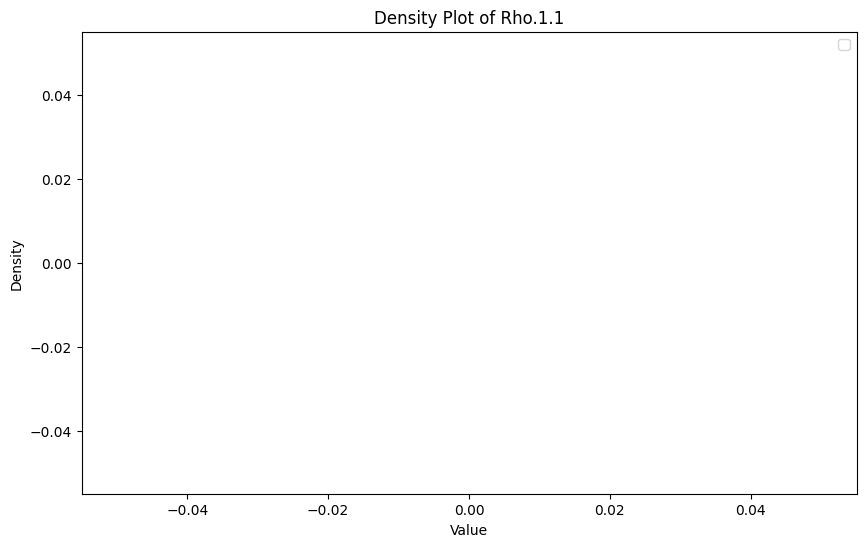

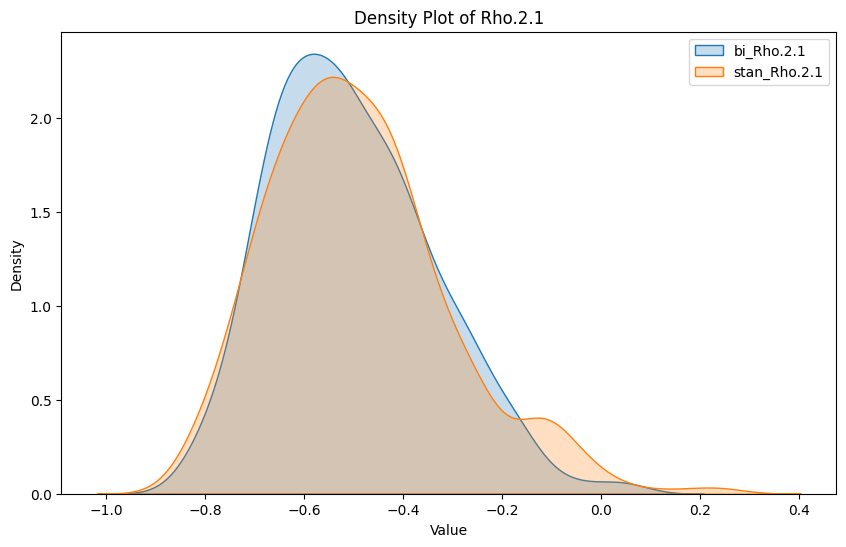

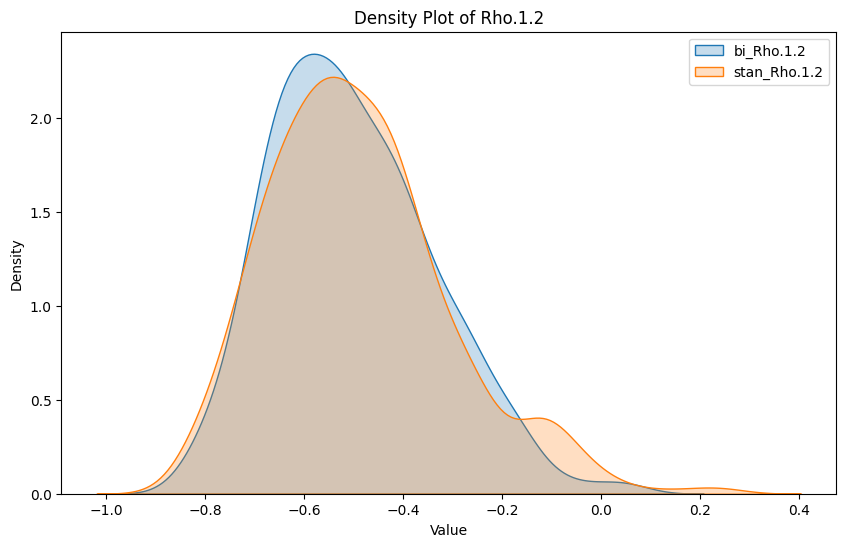

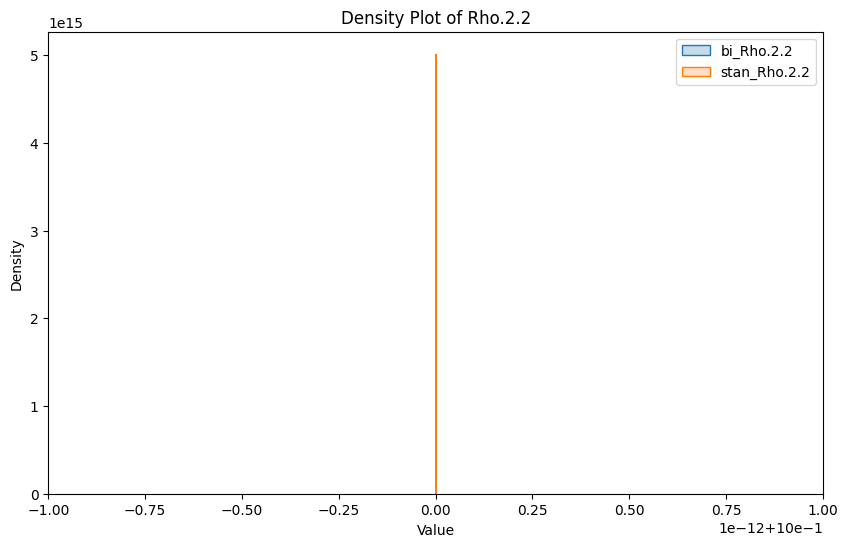

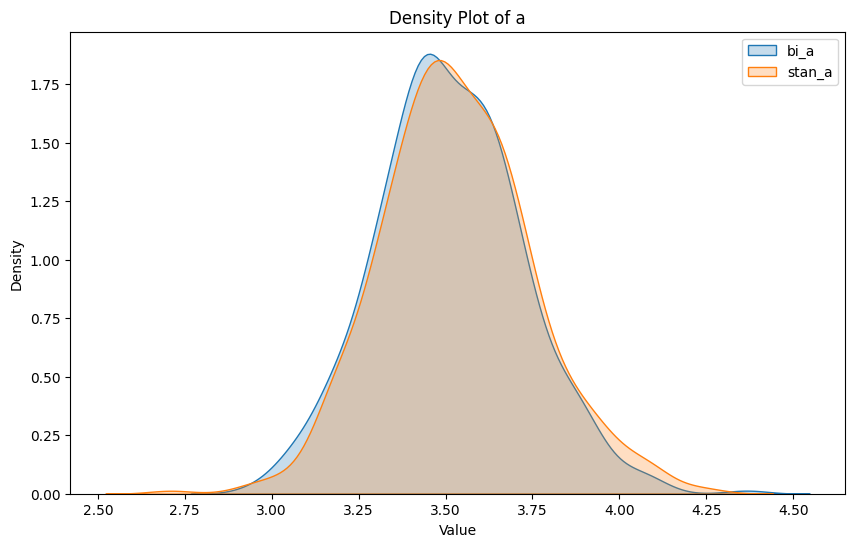

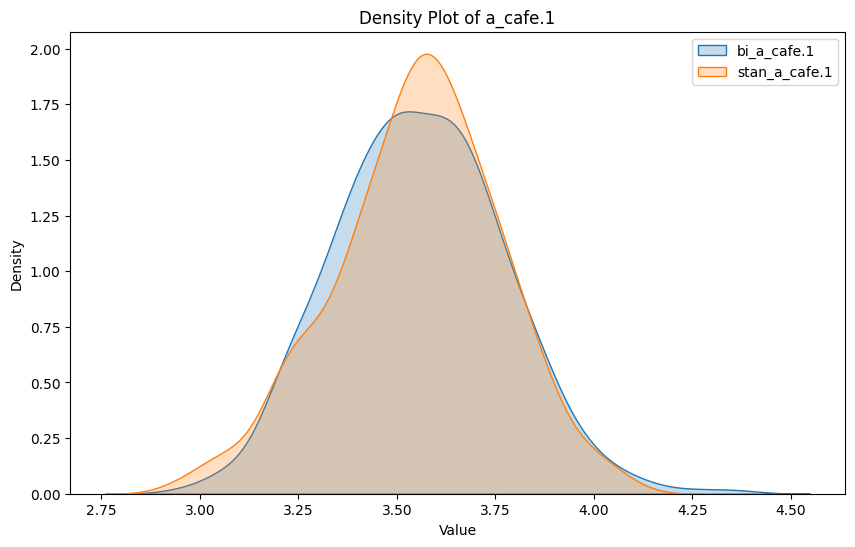

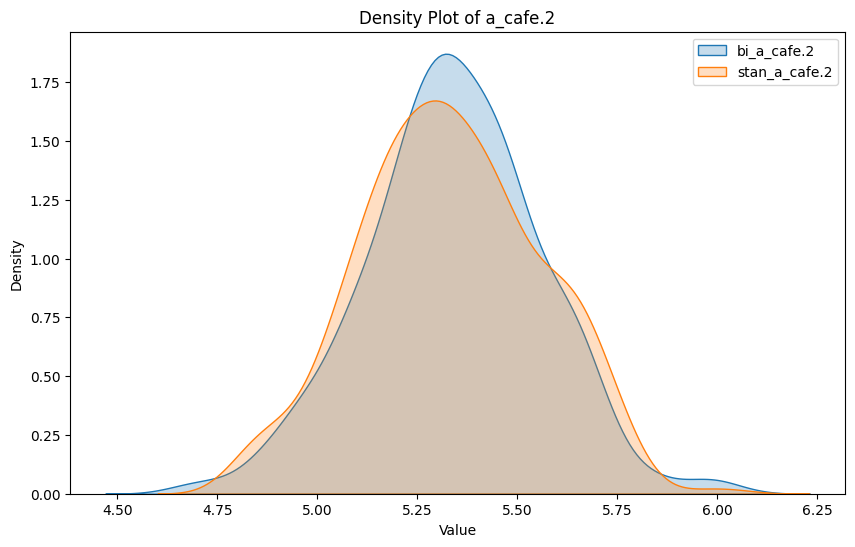

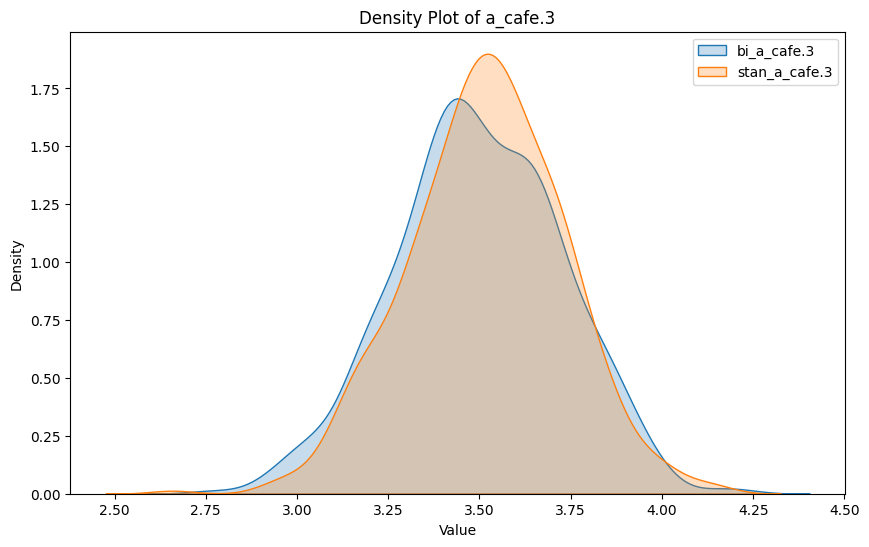

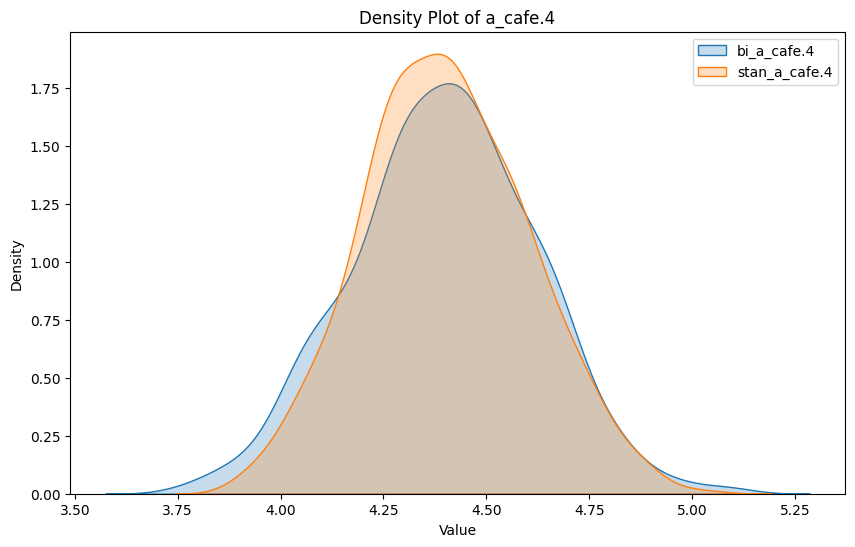

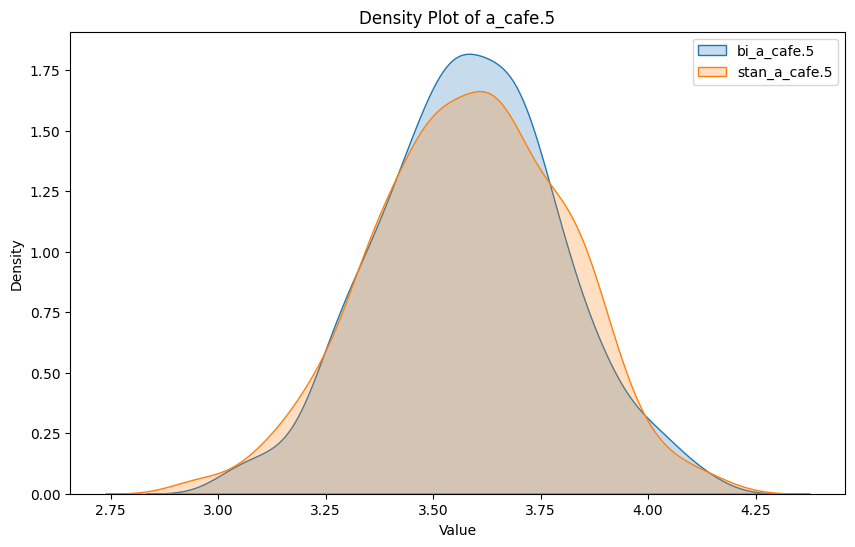

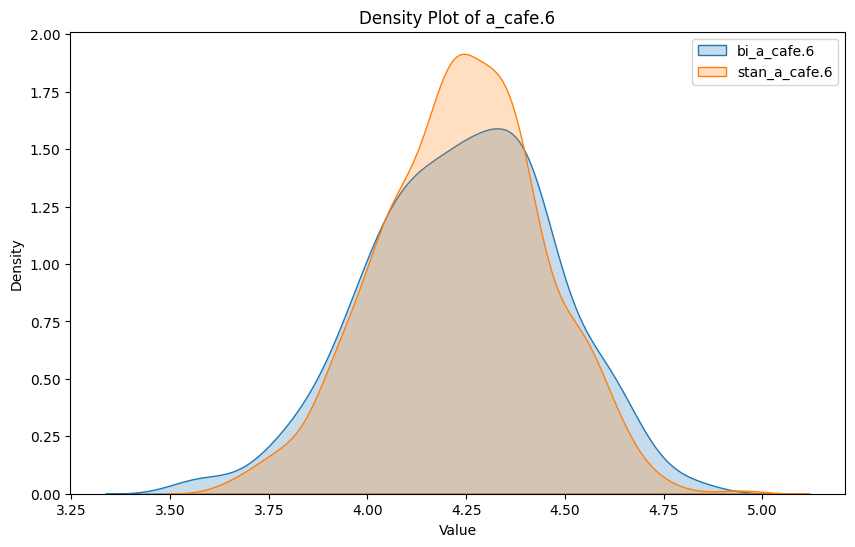

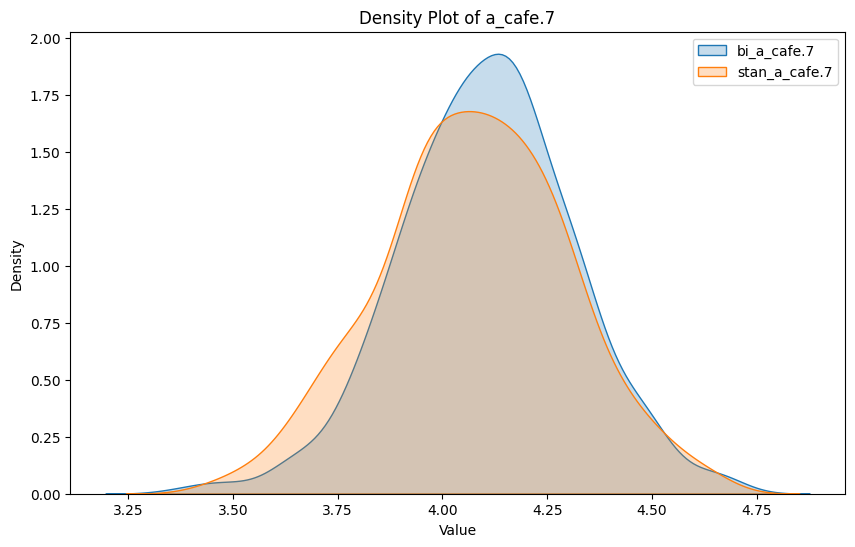

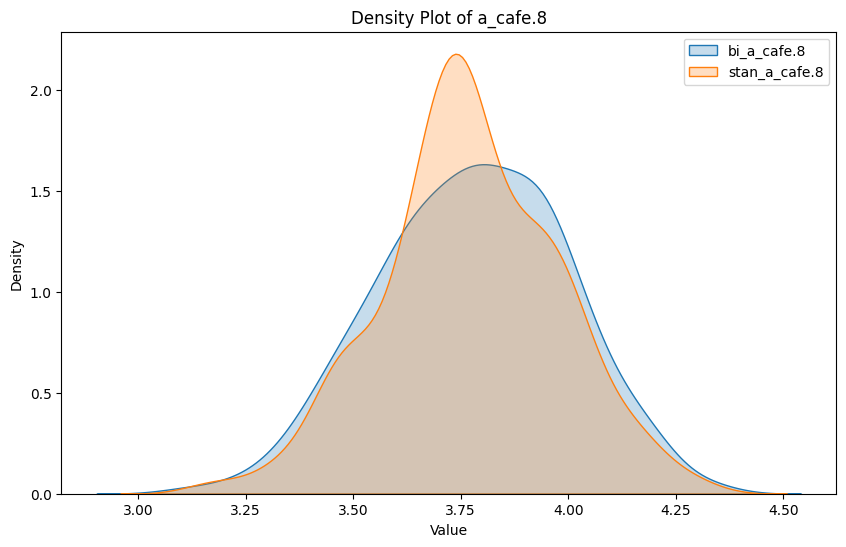

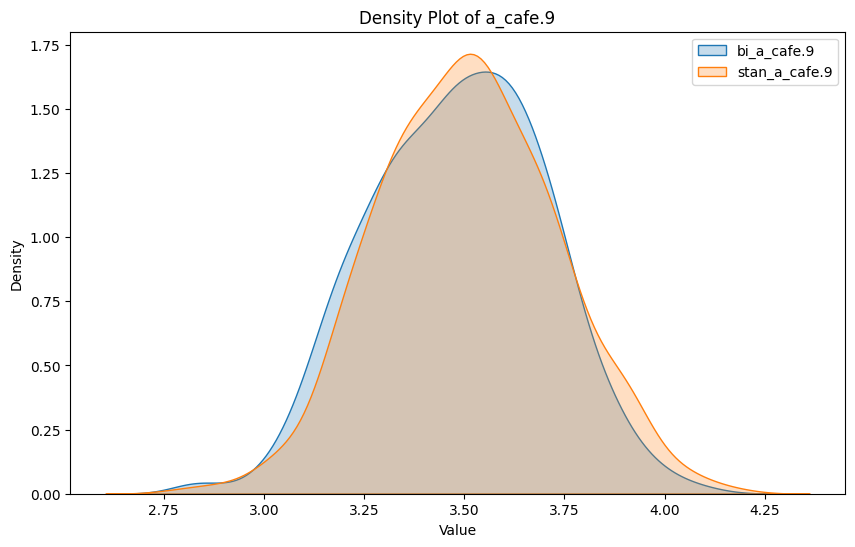

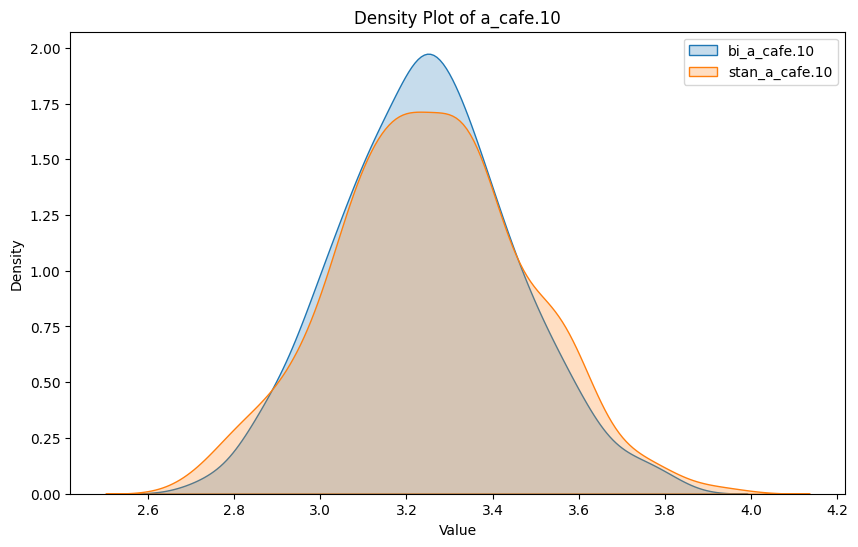

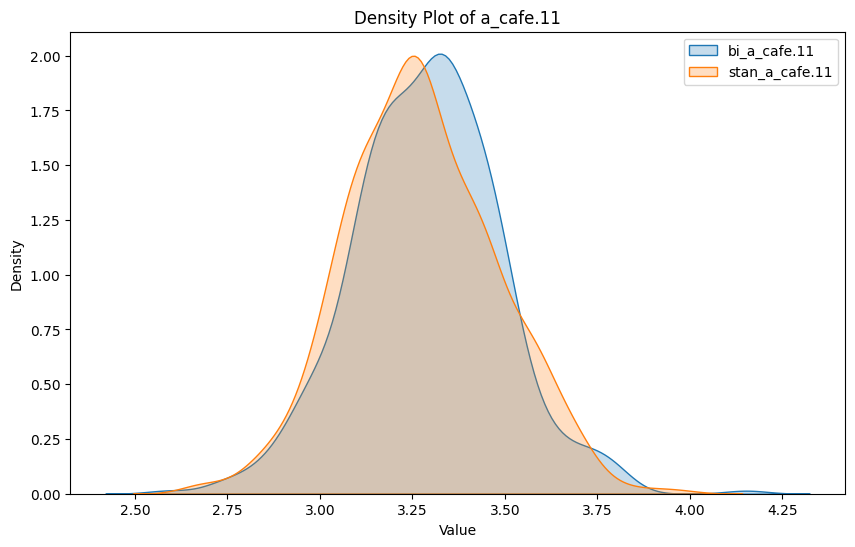

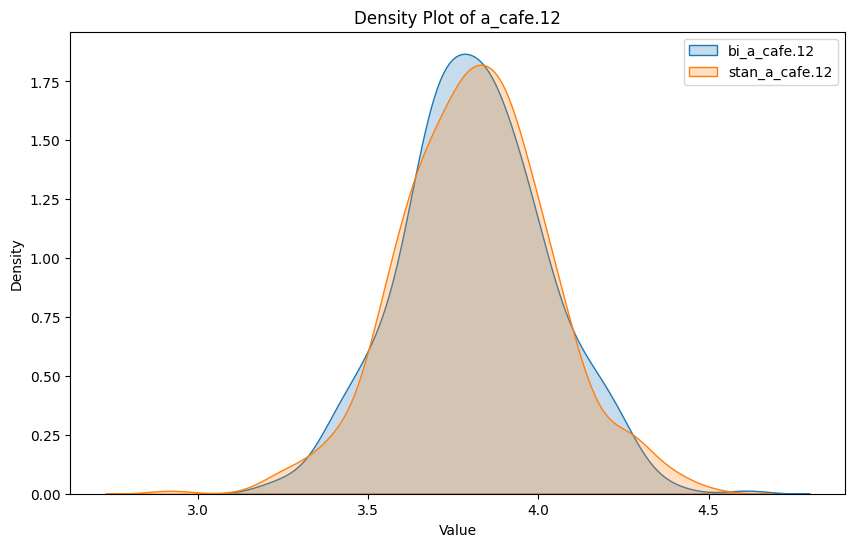

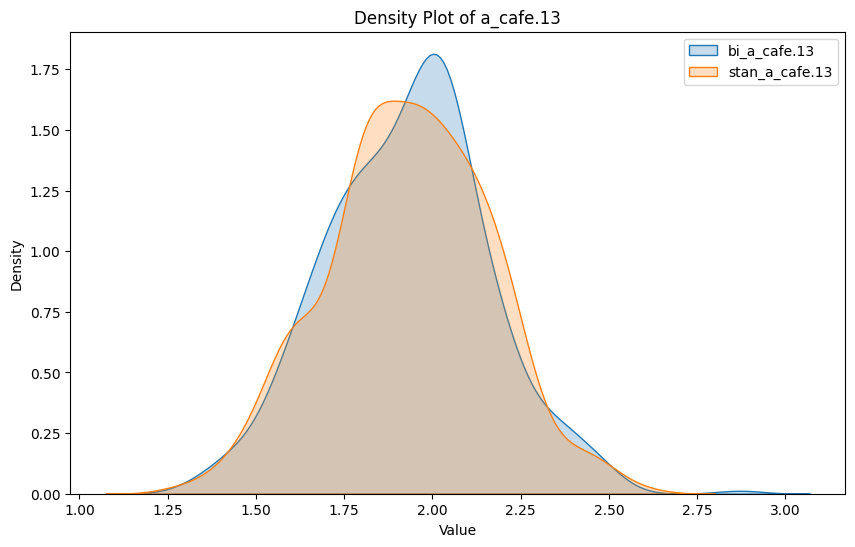

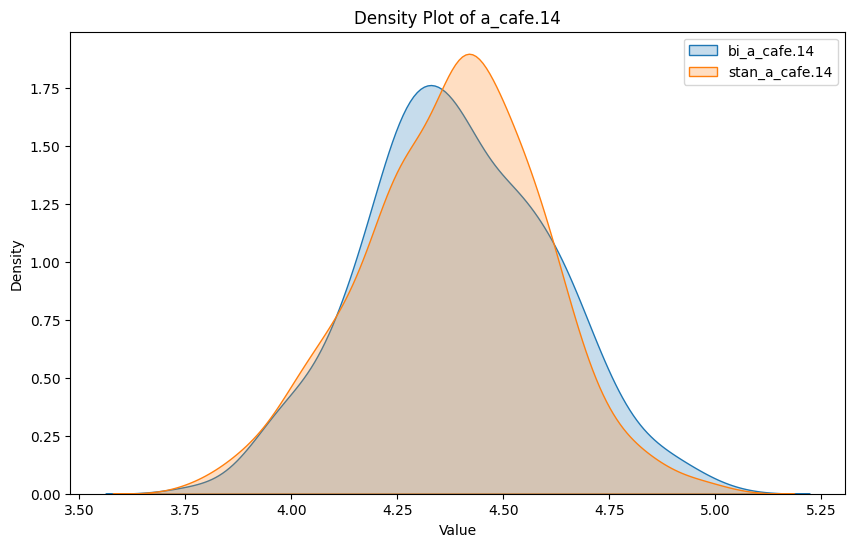

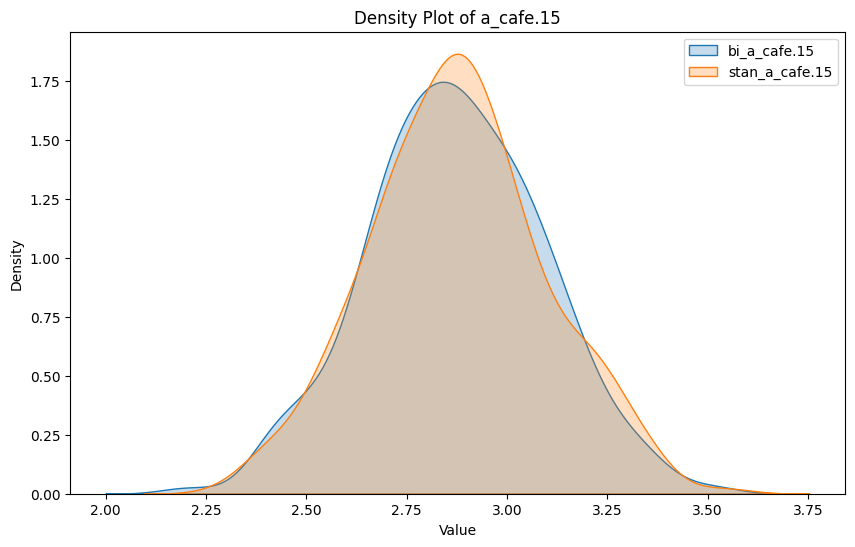

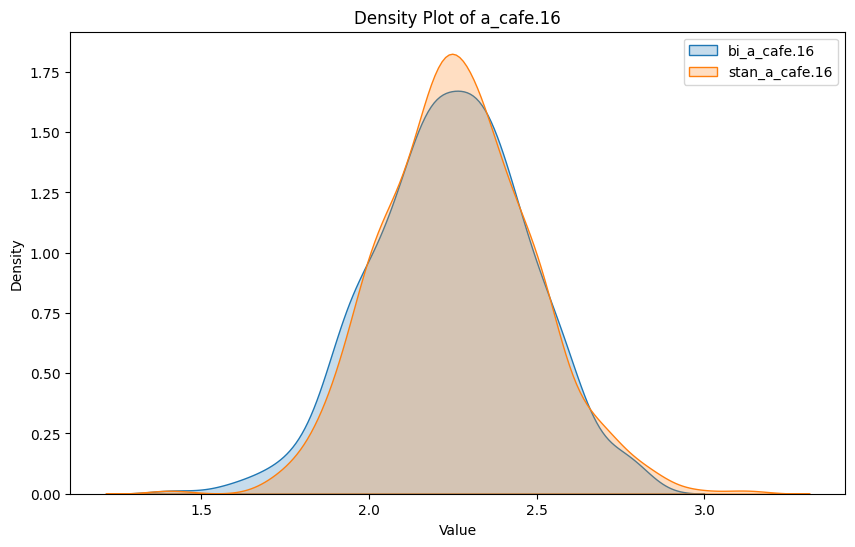

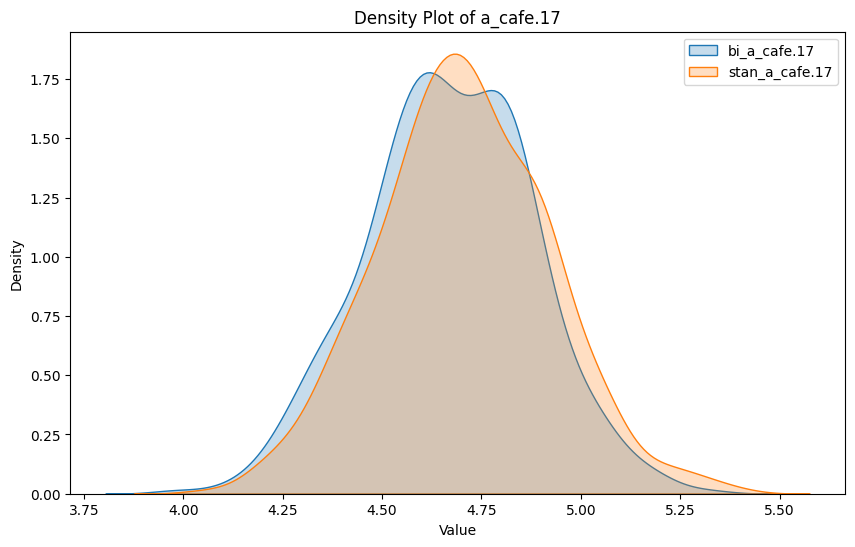

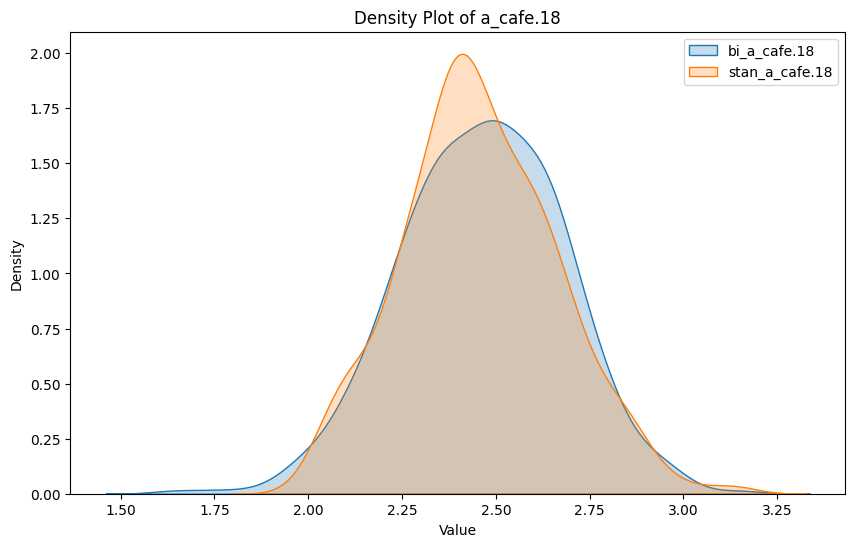

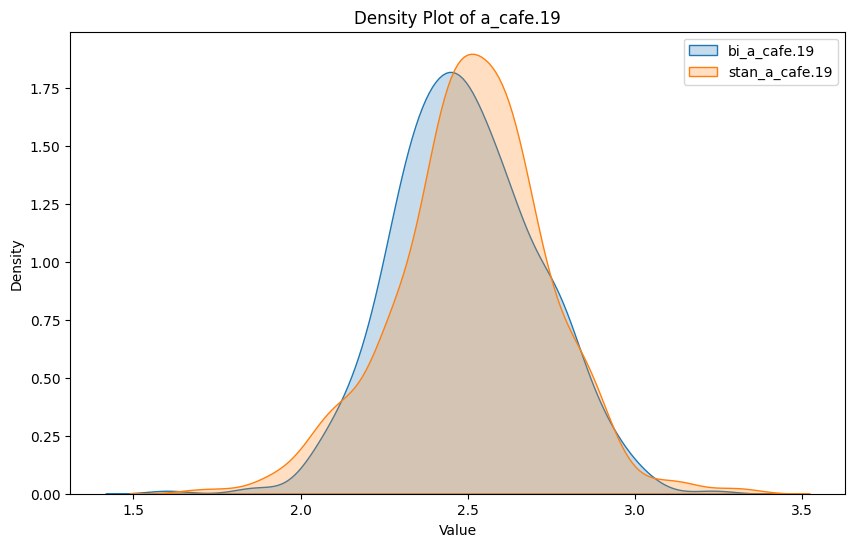

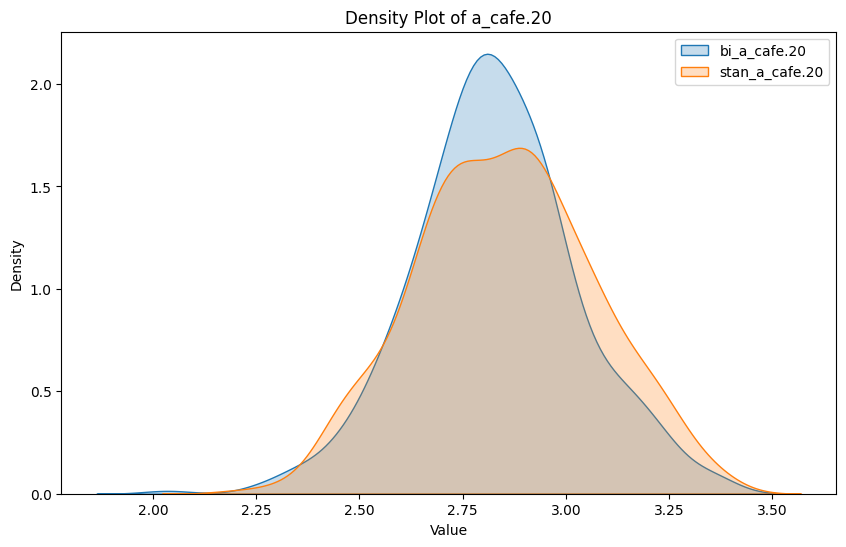

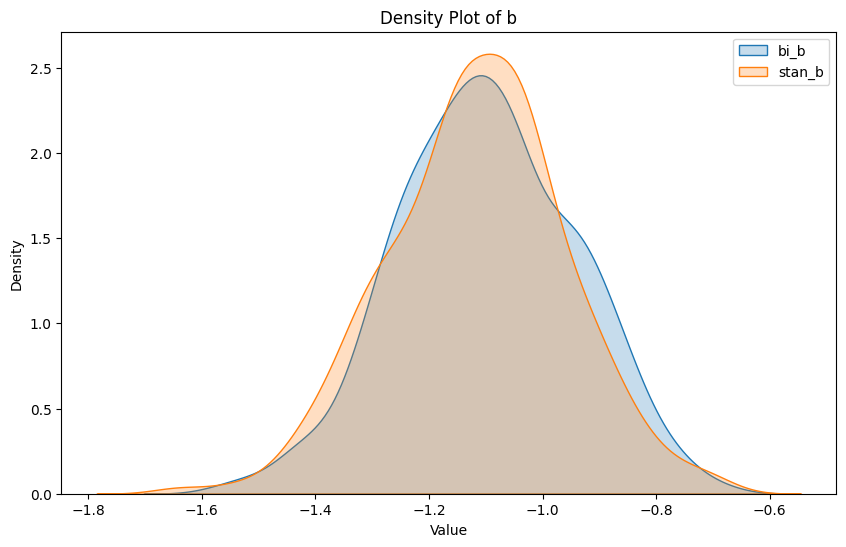

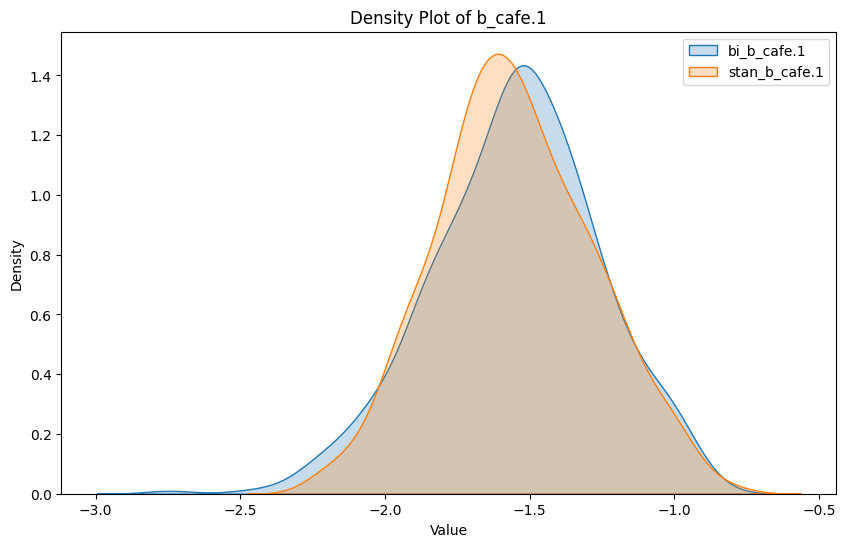

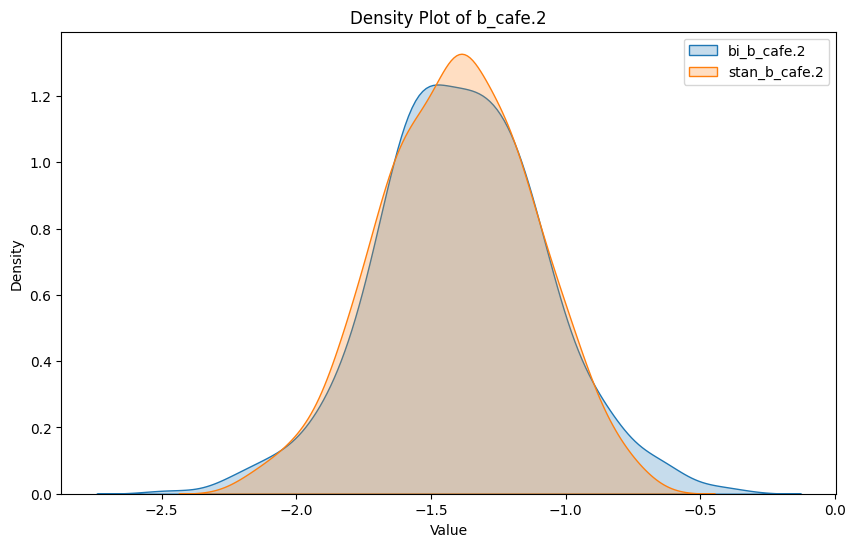

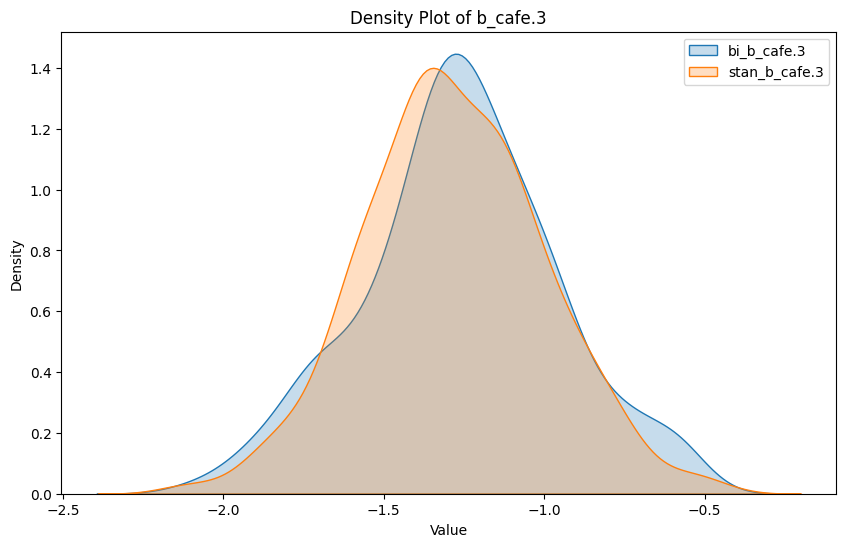

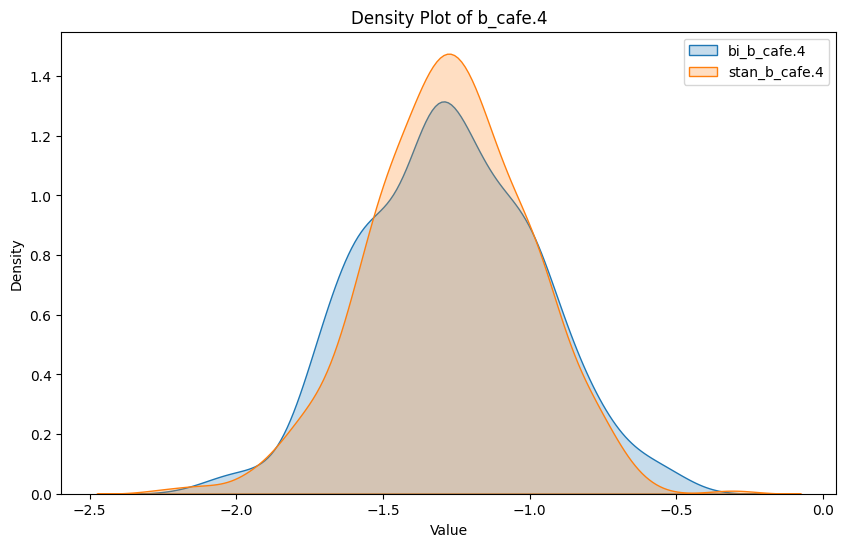

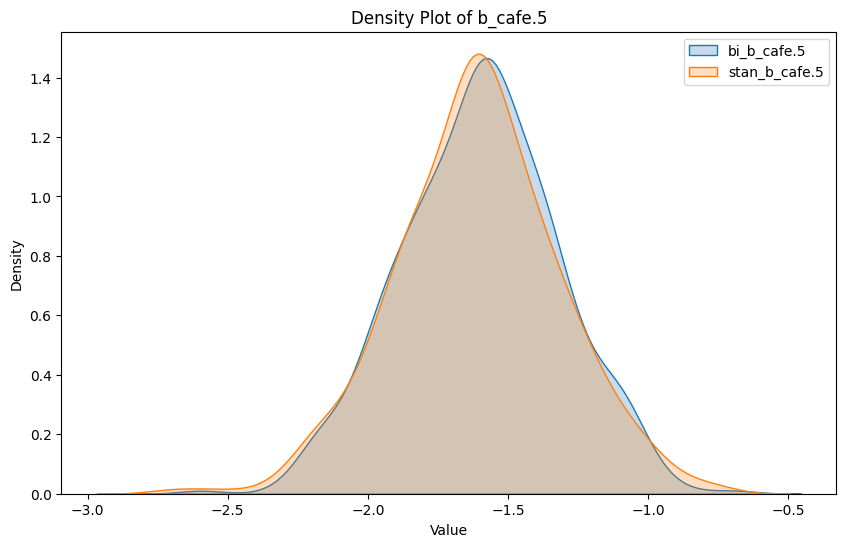

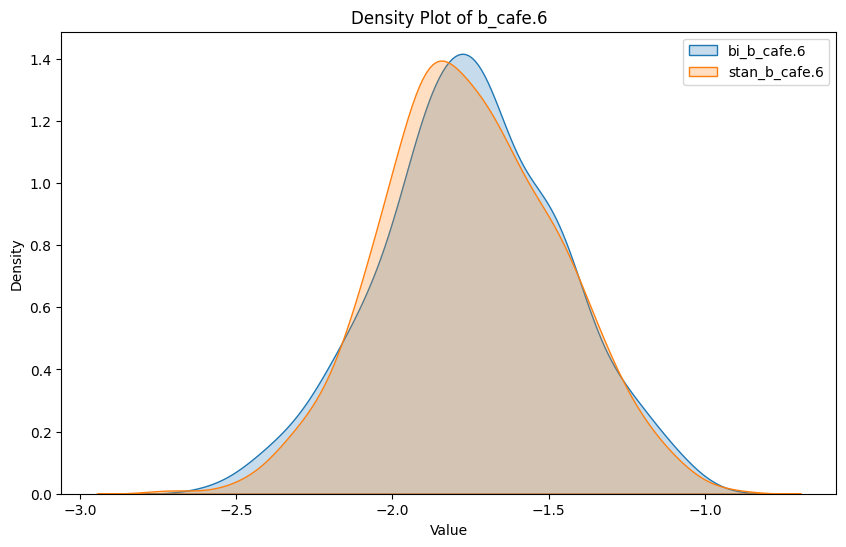

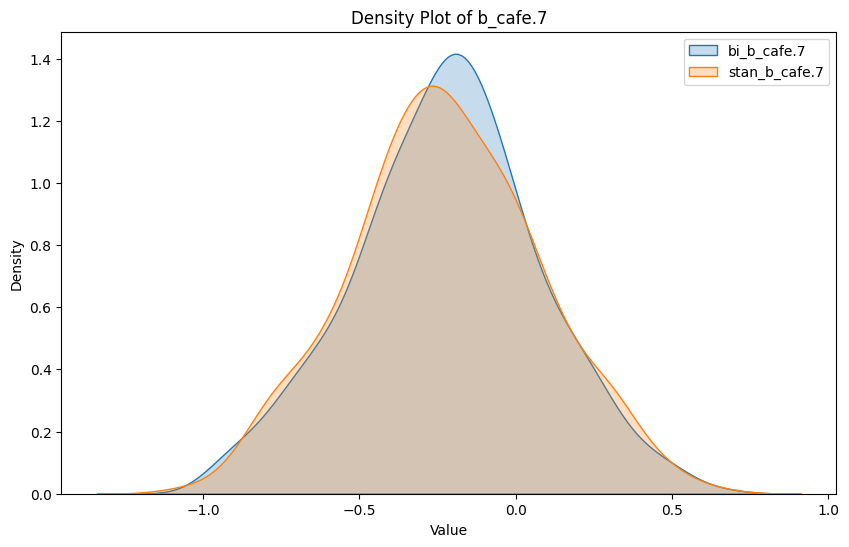

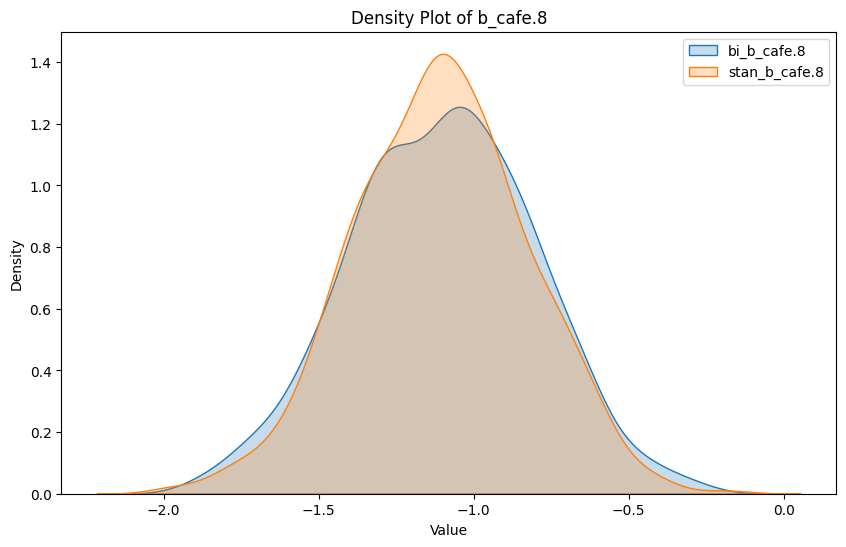

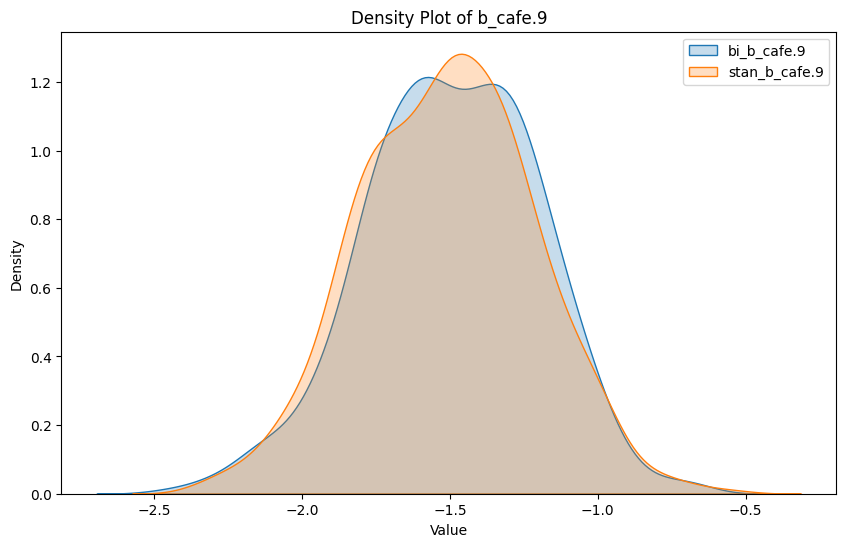

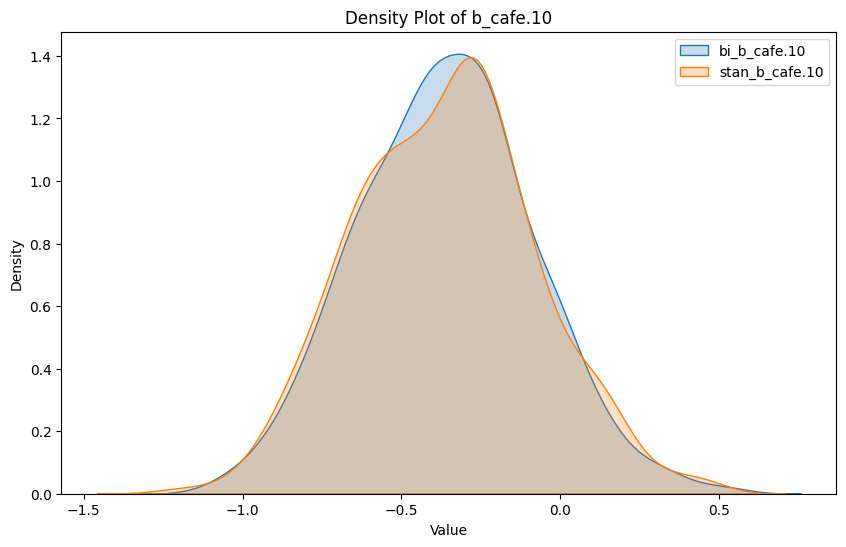

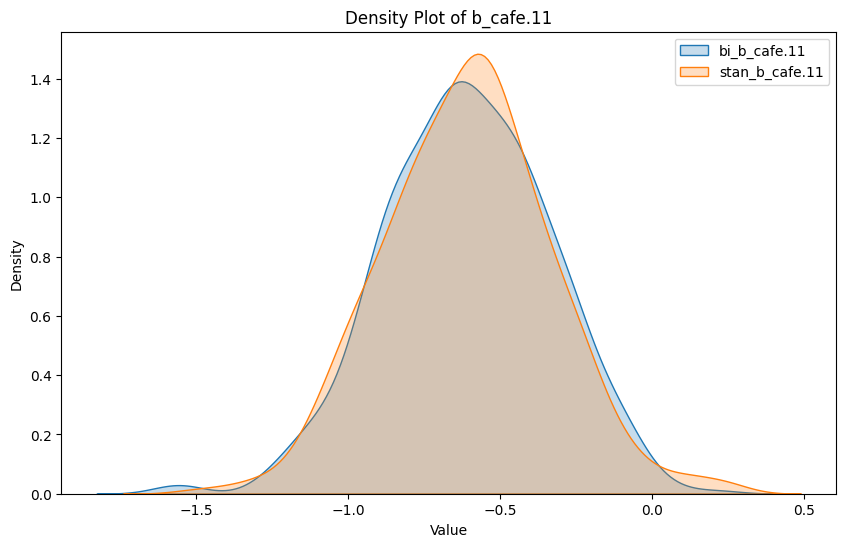

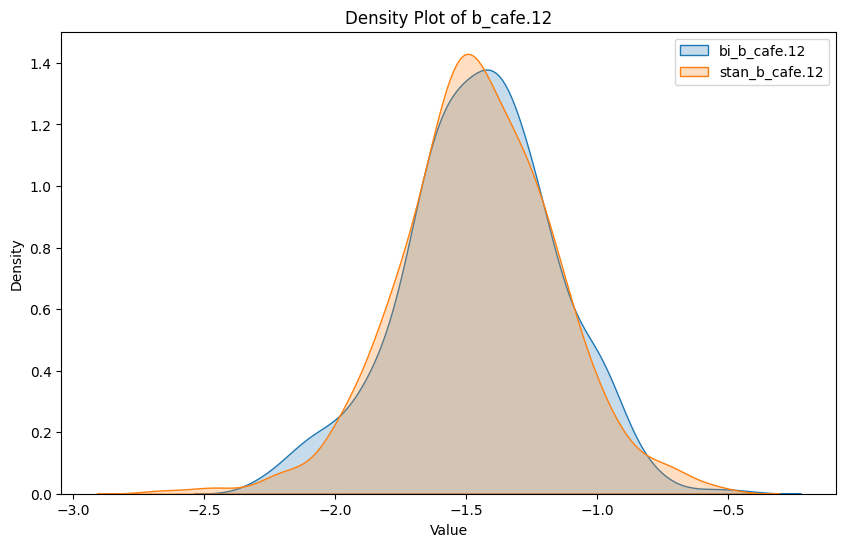

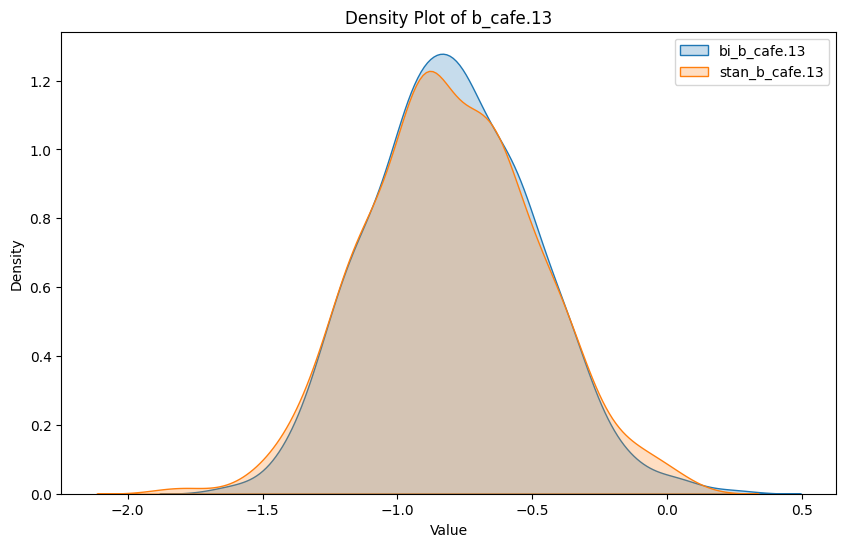

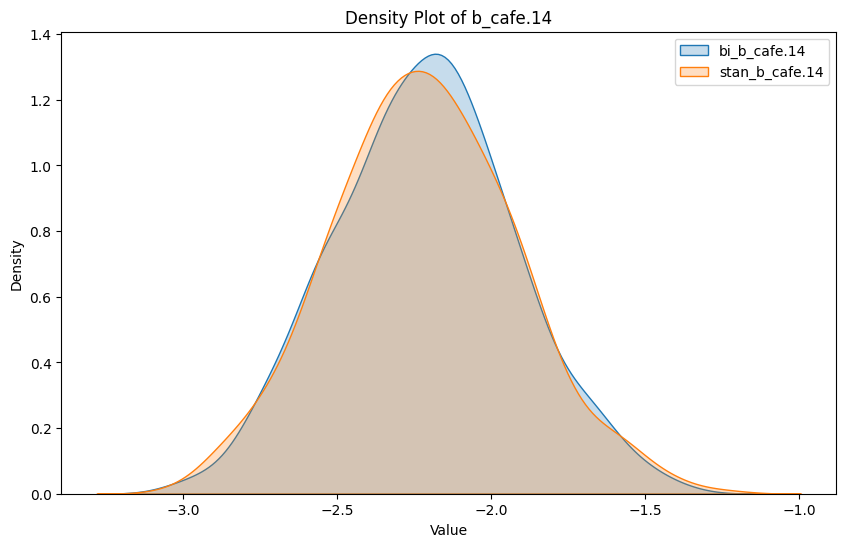

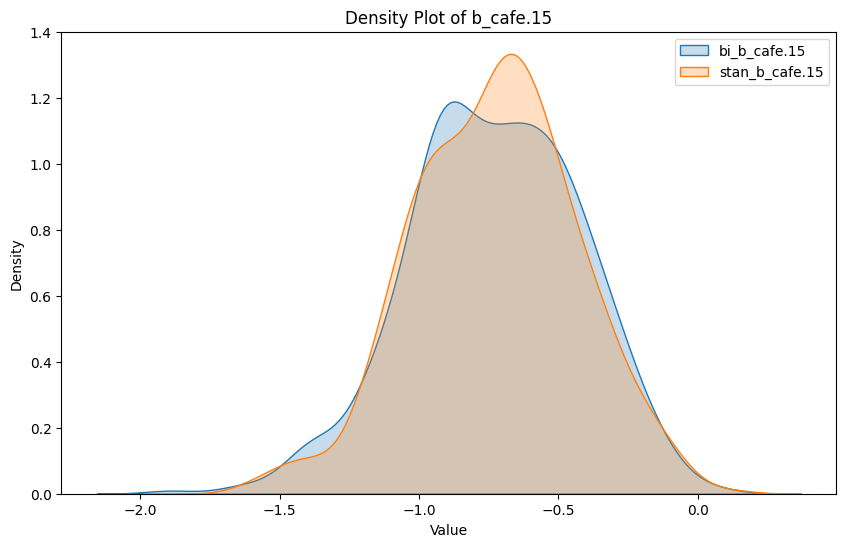

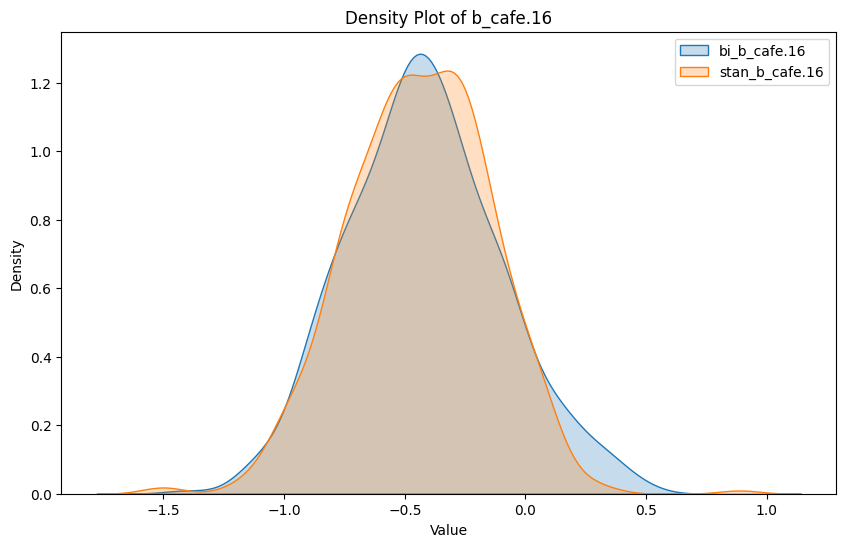

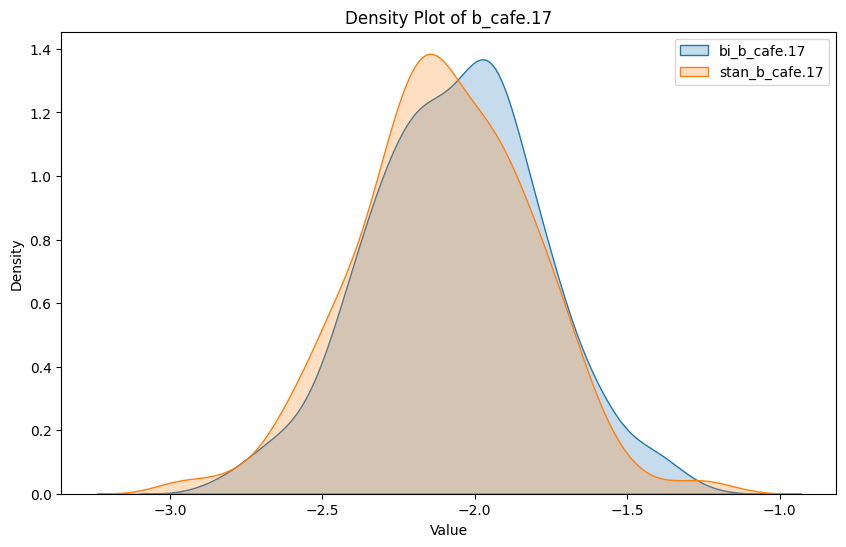

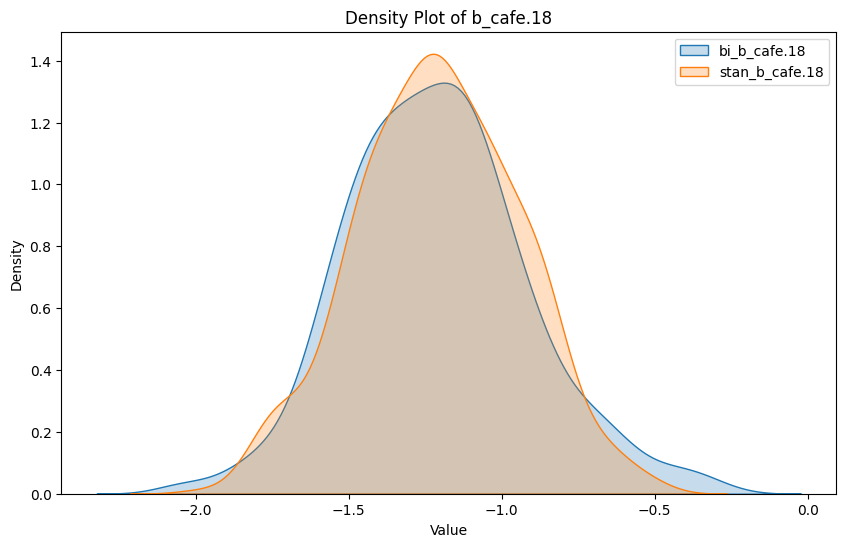

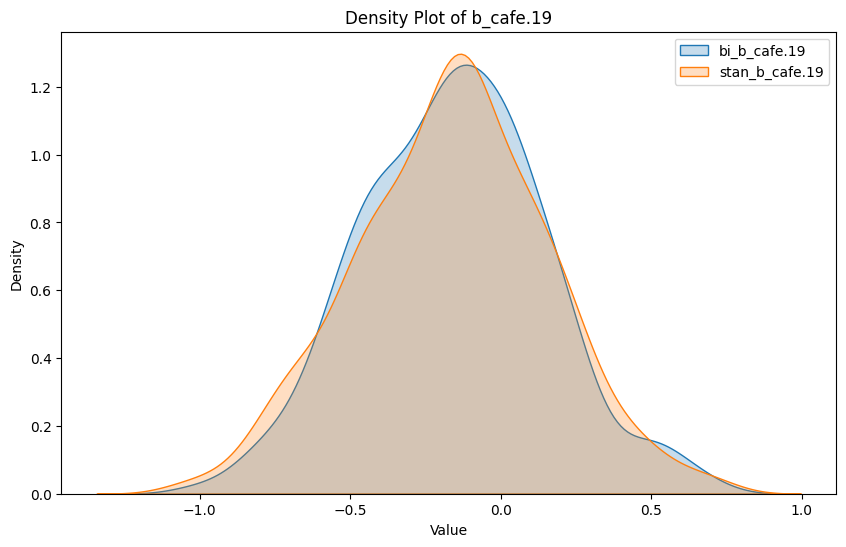

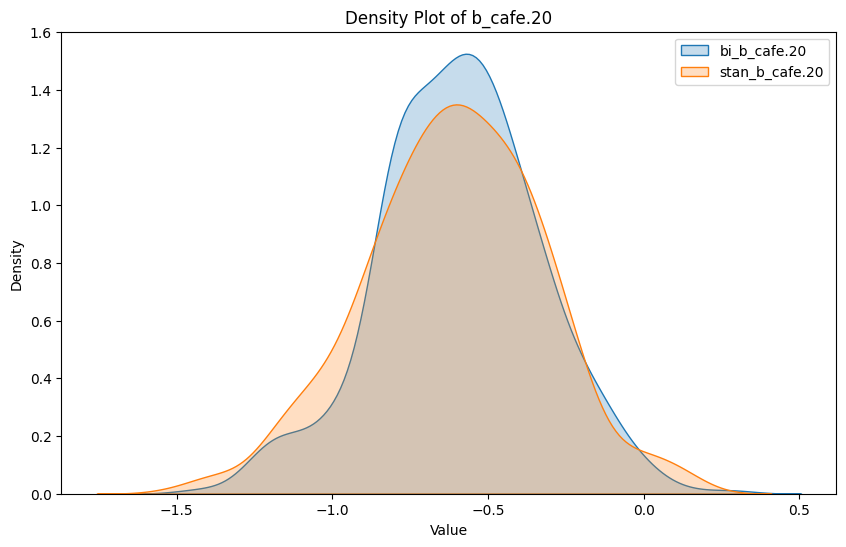

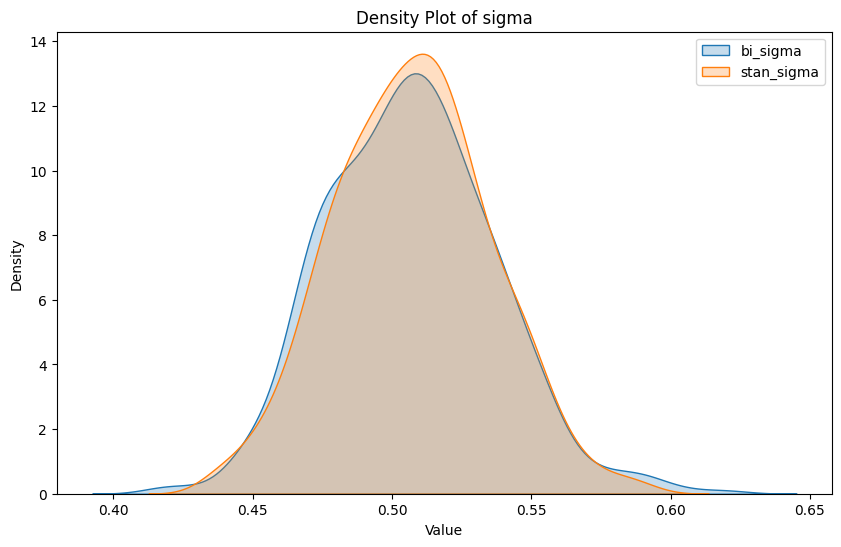

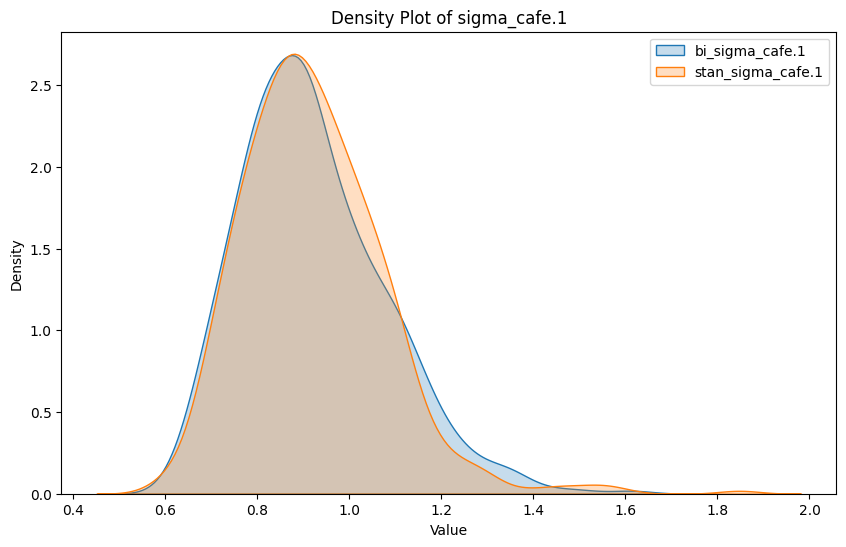

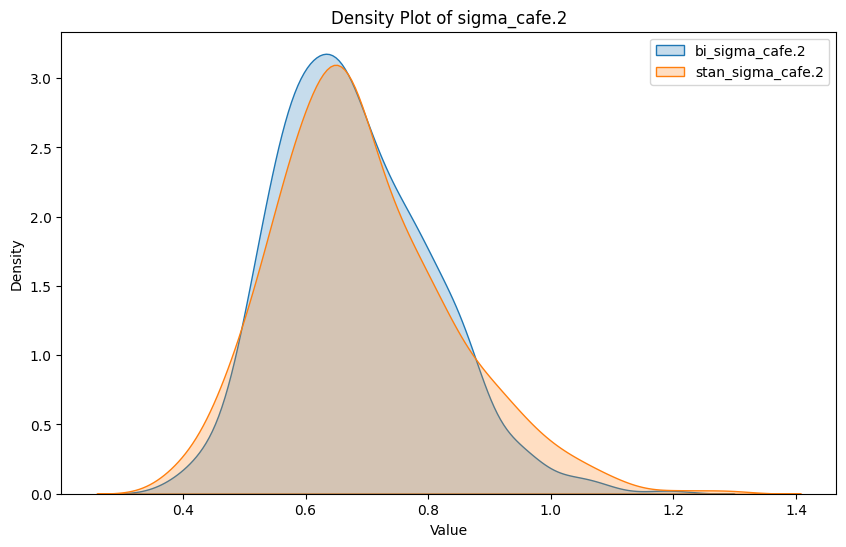

In [238]:
def slice_array_to_dict(array, name="slice"):

    _, dim2, dim3 = array.shape
    
    # Create the dictionary
    slices_dict = {
        f"{name}_{i}_{j}": array[:, i, j]
        for i in range(dim2)
        for j in range(dim3)
    }
    
    return slices_dict
def slice_array_to_dict_2(array, name="slice"):

    _, dim2  = array.shape
    
    # Create the dictionary
    slices_dict = {
        f"{name}_{i}": array[:, i]
        for i in range(dim2)
    }
    
    return slices_dict

# Change posteriors dictionary so that parameters  are in the same order as the data of stan
r = slice_array_to_dict(m.posteriors['Rho'], name="Rho")
a = dict(a=m.posteriors['a'])
b = dict(b=m.posteriors['b'])
sigma = dict(sigma=m.posteriors['sigma'])
a_cafe = slice_array_to_dict_2(m.posteriors['a_b_cafe'][:,:,0], name="a_cafe")
b_cafe = slice_array_to_dict_2(m.posteriors['a_b_cafe'][:,:,1], name="b_cafe")
sigma_cafe_1 = dict(sigma_cafe_1=m.posteriors['sigma_cafe'][:, 0])
sigma_cafe_2 = dict(sigma_cafe_2=m.posteriors['sigma_cafe'][:, 1])
r.update(a)
r.update(a_cafe)
r.update(b)
r.update(b_cafe)
r.update(sigma)
r.update(sigma_cafe_1)
r.update(sigma_cafe_2)
m.posteriors=r
d = prepare_stan_data(df)
df_bi = prepare_bi_data(m)

# Plot the density of the parameters
df_bi.columns =d.columns
for col in df_bi.columns:
    if col in d.columns:  # Ensure the column exists in both DataFrames
        plt.figure(figsize=(10, 6))  # Create a new figure for each plot
        sns.kdeplot(df_bi[col], label=f'bi_{col}', fill=True)
        sns.kdeplot(d[col], label=f'stan_{col}', fill=True)

        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {col}')
        plt.legend()

        # Show the plot
        plt.show()

### <a id='toc2_13_6_'></a>[Parameter recovery](#toc0_)

In [ ]:
def model(cafe, wait, N_cafes, afternoon):
    a = m.dist.normal(5, 2, name = 'a')
    b =  m.dist.normal(-1, 0.5,  name = 'b')
    sigma_cafe =  m.dist.exponential(1, shape=(2,),  name = 'sigma_cafe')
    sigma =  m.dist.exponential( 1, name = 'sigma')
    Rho =  m.dist.lkj(2, 2, name = 'Rho')
    cov = jnp.outer(sigma_cafe, sigma_cafe) * Rho
    a_cafe_b_cafe =  m.dist.multivariatenormal(jnp.stack([a, b]), cov, shape = [N_cafes], name = 'a_b_cafe')    

    a_cafe, b_cafe = a_cafe_b_cafe[:, 0], a_cafe_b_cafe[:, 1]
    mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
    m.dist.normal(mu, sigma, obs=wait)

def sim(N_cafes = 20, N_visits = 10, a = 3.5,b = -1, sigma_a = 1, sigma_b = 0.5, rho = -0.7 ):
    Mu = jnp.array([a,b])
    
    cov_ab = sigma_a * sigma_b *  rho
    
    Sigma = jnp.array([[sigma_a**2, cov_ab], [cov_ab, sigma_b**2]])
    
    jnp.array([1, 2, 3, 4]).reshape(2, 2).T
    
    sigmas = jnp.array([sigma_a, sigma_b])  # standard deviations
    
    Rho = jnp.array([[1, rho], [rho, 1]])  # correlation matrix

    # now matrix multiply to get covariance matrix
    Sigma = jnp.diag(sigmas) @ Rho @ jnp.diag(sigmas)

    seed = jax.random.PRNGKey(5)  # used to replicate example
    vary_effects = m.dist.multivariatenormal(Mu, Sigma, shape=(N_cafes,), sample = True)
    a_cafe = vary_effects[:, 0]
    b_cafe = vary_effects[:, 1]

    seed = jax.random.PRNGKey(22)
    afternoon = jnp.tile(jnp.arange(2), N_visits * N_cafes // 2)
    cafe_id = jnp.repeat(jnp.arange(N_cafes), N_visits)
    mu = a_cafe[cafe_id] + b_cafe[cafe_id] * afternoon
    sigma = 0.5  # std dev within cafes
    wait =  m.dist.normal(mu, sigma, sample = True)
    d = pd.DataFrame(dict(cafe=cafe_id, afternoon=afternoon, wait=wait))
    return d

def estimate(N_cafes = 20, N_visits = 10, a = 3.5,b = -1,sigma_a = 1, sigma_b = 0.5, rho = -0.7):
    d = sim(N_cafes,N_visits , a, b, sigma_a, sigma_b, rho)
    m = bi(print_devices_found=False)
    m.data_on_model = dict(
        cafe = d.cafe.values, 
        wait = d.wait.values, 
        N_cafes = len(d.cafe.unique()),
        afternoon =d.afternoon.values
    )

    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(nsim, N_cafes = 20, N_visits = 10, a = 3.5,b = -1,sigma_a = 1, sigma_b = 0.5, rho = -0.7 ):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(N_cafes = N_cafes, N_visits = N_visits,a = a[i], b = b[i], sigma_a = sigma_a[i], sigma_b = sigma_b[i], rho = rho[i])
        estimations_filtered = estimations.loc[estimations.index.isin(['Rho[0, 1]', 'a', 'b', 'sigma_cafe[0]', 'sigma_cafe[1]'])] # Selecting paramters from model
        data = {'sim': np.repeat(i, len(estimations_filtered.values)), 
                'parameter': estimations_filtered.index, 
                'simulated' : jnp.array([Rho[i],  a[i], b[i], sigma_a[i], sigma_b[i]]), 
                'estimations': estimations_filtered.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
nsim = 100
a =  m.dist.normal(0, 1, shape= (nsim,), name = 'a', sample=True).tolist()
b =  m.dist.normal(0, 0.5, shape=(nsim,), name = 'b', sample=True).tolist()
sigma_cafe =  m.dist.exponential(1, shape=(nsim,2), name = 'sigma_cafe', sample=True)
Rho =  m.dist.beta(2, 5, shape=(nsim,), name = 'b', sample=True).tolist()
sigma_a =  sigma_cafe[:,0].tolist()
sigma_b = sigma_cafe[:,1].tolist()
i=0
#sim(N_cafes = 20, N_visits = 10, a = a[i],b = b[i],sigma_a = sigma_a[i], sigma_b = sigma_b[i], rho = Rho[i] )
#estimations = estimate(a = a[1], b = b[1], sigma_a = sigma_a[1], sigma_b = sigma_b[1], rho = Rho[1])
param_recovery(nsim = nsim, N_cafes = 20, N_visits = 10, a =a, b = b, sigma_a =  sigma_cafe[:,0], sigma_b = sigma_cafe[:,1], rho = Rho)

## <a id='toc2_14_'></a>[Gaussian Processes](#toc0_)

### <a id='toc2_14_1_'></a>[BI](#toc0_)

In [ ]:
import jax
@jax.jit
def cov_GPL2(x, sq_eta, sq_rho, sq_sigma):
    """
    Computes the covariance matrix for a Gaussian Process using the 
    squared exponential kernel, version L2 (squared Euclidean distance).

    Args:
        x: Distance matrix between points.
        sq_eta: Squared variance parameter (eta^2).
        sq_rho: Squared length scale parameter (rho^2).
        sq_sigma: Squared noise variance parameter (sigma^2).

    Returns:
        K: Covariance matrix incorporating the squared exponential kernel, version L2.
    """
    N = x.shape[0]
    K = sq_eta * jnp.exp(-sq_rho * jnp.square(x))
    K = K.at[jnp.diag_indices(N)].add(sq_sigma)
    return K


In [ ]:
import jax.numpy as jnp
import numpyro
m = bi(platform='cpu')
m.data(data_path + 'Kline2.csv', sep=";")
islandsDistMatrix = pd.read_csv(data_path + 'islandsDistMatrix.csv', index_col=0)
m.data_to_model(['total_tools', 'population'])
m.data_on_model["society"] = jnp.arange(0,10)# index observations
m.data_on_model["Dmat"] = islandsDistMatrix.values # Distance matrix


def model(Dmat, population, society, total_tools):
    a = m.dist.exponential(1, name = 'a')
    b = m.dist.exponential(1, name = 'b')
    g = m.dist.exponential(1, name = 'g')

    # non-centered Gaussian Process prior
    etasq = m.dist.exponential(2, name = 'etasq')
    rhosq = m.dist.exponential(0.5, name = 'rhosq')
    SIGMA = cov_GPL2(Dmat, etasq, rhosq, 0.01)
    k = m.dist.multivariatenormal(0, SIGMA, name = 'k')
    #k = m.gaussian.gaussian_process(Dmat, etasq, rhosq, 0.01, shape = (10,))
    k = m.gaussian.kernel_L2(Dmat, etasq, rhosq, 0.01)
    lambda_ = a * population**b / g * jnp.exp(k[society])

    m.dist.poisson(lambda_, obs=total_tools)

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500) 
m.summary()

Parameters k are correlated between them, so order of comparison can't be found as they are interchangeable. 

### <a id='toc2_14_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)
pd=import('pandas')
# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Kline2.csv", sep = ''), sep=';')
islandsDistMatrix = pd$read_csv(paste(system.file(package = "BI"),"/data/islandsDistMatrix.csv", sep = ''), index_col=as.integer(0))
m$data_to_model(list('total_tools', 'population'))
m$data_on_model$society = jnp$arange(0,10, dtype='int64')
m$data_on_model$Dmat = jnp$array(islandsDistMatrix)


# Define model ------------------------------------------------
model <- function(Dmat, population, society, total_tools){
  a = bi.dist.exponential(1, name = 'a')
  b = bi.dist.exponential(1, name = 'b')
  g = bi.dist.exponential(1, name = 'g')
  
  # non-centered Gaussian Process prior
  etasq = bi.dist.exponential(2, name = 'etasq')
  rhosq = bi.dist.exponential(0.5, name = 'rhosq')
  z = bi.dist.normal(0,1, name = 'z', shape = c(10))
  r = m$kernel_sq_exp(Dmat, z, etasq, rhosq, 0.01)
  SIGMA = r[[1]]
  L_SIGMA = r[[2]]
  k = r[[3]]
  lambda_ = a * population**b / g * jnp$exp(k[society])
  m$poisson(lambda_, obs=total_tools)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


### STAN

In [ ]:
import time as tm
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """ 
functions{
  matrix cov_GPL2(matrix x, real sq_alpha, real sq_rho, real delta) {
    int N = dims(x)[1];
    matrix[N, N] K;
    for (i in 1:(N-1)) {
      K[i, i] = sq_alpha + delta;
      for (j in (i + 1):N) {
        K[i, j] = sq_alpha * exp(-sq_rho * square(x[i,j]) );
        K[j, i] = K[i, j];
      }
    }
    K[N, N] = sq_alpha + delta;
    return K;
  }
}

data{
  array[10] int T;
  array[10] int society;
  array[10] int P;
  matrix[10,10] Dmat;
}

parameters{
 real<lower=0> a;
 real<lower=0> b;
 real<lower=0> etasq;
 real<lower=0> g; 
 real<lower=0> rhosq;
 vector[10] k;
}

model{
  vector[10] lambda;
  matrix[10,10] SIGMA;
  rhosq ~ exponential( 0.5 );
  etasq ~ exponential( 2 );
  a ~ exponential( 1 );
  b ~ exponential( 1 );
  g ~ exponential( 1 );

  SIGMA = cov_GPL2(Dmat, etasq, rhosq, 0.01);
  k ~ multi_normal( rep_vector(0,10) , SIGMA );
  for ( i in 1:10 ) {
    lambda[i] = (a * P[i]^b/g) * exp(k[society[i]]);
  }
  T ~ poisson( lambda );
}
"""

data = {
    'T' : m.df["total_tools"].values.astype(int),
    'P' : m.df["population"].values.astype(int),
    'society' : np.array(m.data_on_model['society']+1).astype(int),
    'Dmat' : np.array(islandsDistMatrix)
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### Output comparison

In [ ]:
plot_comparaison(m, df)

### Parameter recovery
